This python notebook will be dedicated to do some preliminary analyses on the datasets that we have.
Our initial goal is to look at data from the 2$\sigma$ competition:
https://www.kaggle.com/c/two-sigma-financial-news/data

Since that isn't available until around Aug. 5, we'll use data from Aaron7sun
https://www.kaggle.com/aaron7sun/stocknews/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce # to merge dataframes

In [2]:
# read in the datasets
combNews   = pd.read_csv('datasets/dailyStockNews/Combined_News_DJIA.csv',parse_dates=['Date']) # has top 25 headlines from reddit news file
djia       = pd.read_csv('datasets/dailyStockNews/DJIA_table.csv',parse_dates=['Date']) # stock data

# merge datasets
dfList     = [combNews, djia]
dfMerged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), dfList)
dfMerged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


# This is some preliminary time series analysis:
# Doing regression with ARIMAX model, using setiments of previous day as exogeneous variables
# Basically for trying to combine sentiments with long-term trends

In [3]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()

# get the column names for top news
header   = [i for i in dfMerged.columns if 'Top' in i]
features = []
# get the sentiment scores for each column
for i in header:
    counter = 0
    compoundSentiment = []
    features.append(i + 'Sentiment')
    for j in dfMerged[i]:
        try:
            polarityScore = sia.polarity_scores(j)
            compoundSentiment.append(polarityScore['compound'])
        except: # one cell is empty
            compoundSentiment.append(0)
    dfMerged[i + 'Sentiment'] = compoundSentiment

dfMerged.head()

C:\Users\TairuLyu\Anaconda2\envs\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16Sentiment,Top17Sentiment,Top18Sentiment,Top19Sentiment,Top20Sentiment,Top21Sentiment,Top22Sentiment,Top23Sentiment,Top24Sentiment,Top25Sentiment
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,0.0000,0.0,0.2086,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.4019
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,0.0000,0.0,-0.6597,0.0000,0.0000,-0.8020,0.0000,-0.3182,-0.1832,0.0000
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,0.0000,0.0,0.0772,-0.5994,-0.5859,0.0000,0.5267,0.3818,0.0000,0.0000
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,0.0000,0.0,0.0000,-0.5423,-0.0258,-0.2960,0.4939,-0.5719,-0.4215,-0.3400
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,-0.6249,0.0,0.0000,0.0000,0.0000,-0.4404,-0.5994,0.1779,-0.6908,0.7096


In [4]:
# create the dataframes for the datas
# index the data such that the features correspond to the day before label
X = dfMerged[features].iloc[:-1] 
y = dfMerged['Label'].iloc[1:]

# Make training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=2)

# set the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()

# fit model
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5130784708249497
Precision: 0.5354330708661418
Recall: 0.758364312267658


In [5]:
import itertools
import statsmodels.api as sm
Column = []
Column.append('Date')
Column.append('Label')
for i in features:
    Column.append(i)
Column.append('Close')
Djia = dfMerged[Column]
Djia.head()

,Date,Label,Top1Sentiment,Top2Sentiment,Top3Sentiment,Top4Sentiment,Top5Sentiment,Top6Sentiment,Top7Sentiment,Top8Sentiment,...,Top17Sentiment,Top18Sentiment,Top19Sentiment,Top20Sentiment,Top21Sentiment,Top22Sentiment,Top23Sentiment,Top24Sentiment,Top25Sentiment,Close
0,2008-08-08,0,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,...,0.0,0.2086,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.4019,11734.320312
1,2008-08-11,1,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,...,0.0,-0.6597,0.0000,0.0000,-0.8020,0.0000,-0.3182,-0.1832,0.0000,11782.349609
2,2008-08-12,0,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,...,0.0,0.0772,-0.5994,-0.5859,0.0000,0.5267,0.3818,0.0000,0.0000,11642.469727
3,2008-08-13,0,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,...,0.0,0.0000,-0.5423,-0.0258,-0.2960,0.4939,-0.5719,-0.4215,-0.3400,11532.959961
4,2008-08-14,1,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,...,0.0,0.0000,0.0000,0.0000,-0.4404,-0.5994,0.1779,-0.6908,0.7096,11615.929688


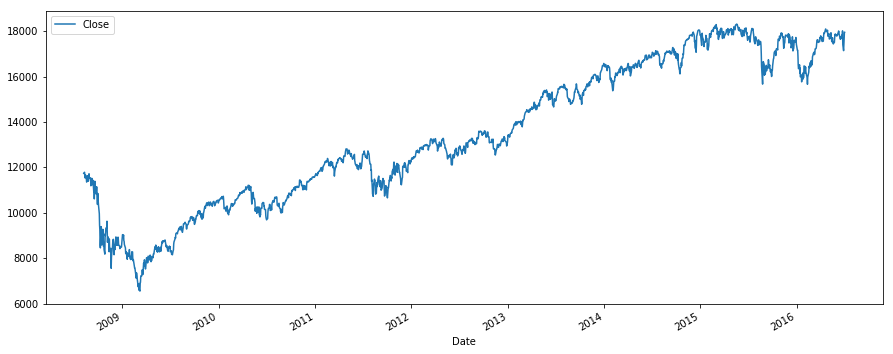

In [6]:
Djia = Djia.set_index('Date')
Djia.plot(y='Close',figsize=(15, 6))
plt.show()

In [7]:
Data_fit = (Djia.iloc[1:]).copy()
Data_X = Djia[features].iloc[:-1]
Data_fit.loc[:,features] = Data_X.values
#print(Data_X.values)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA30AAAFiCAYAAABClbHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xd4XNW19/HvGWmkUZfVZcuWbLk33HABm2KMDaa30FsgoUNuXkIgIQFCKCEhN3RyKQFCDS30YowBGxv33quKZVu9t9HMef+YohlpVKxmy/59nscPM/vsc+aMJONZWnuvZZimiYiIiIiIiByZLIf6BkRERERERKT7KOgTERERERE5ginoExEREREROYIp6BMRERERETmCKegTERERERE5ginoExEREREROYIp6BMRERERETmCKegTERERERE5ginoExEREREROYIp6BMRERERETmCBR/qG+iohIQEMyMj41DfhoiIiIiIyCGxcuXKQtM0E9ua12uDvoyMDFasWHGob0NEREREROSQMAwjqz3ztLxTRERERETkCKagT0RERERE5AimoE9EREREROQI1mv39AVit9vJzc2ltrb2UN9Kj7LZbKSlpWG1Wg/1rYiIiIiIyGHmiAr6cnNziYqKIiMjA8MwDvXt9AjTNCkqKiI3N5eBAwce6tsREREREZHDzBG1vLO2tpb4+PijJuADMAyD+Pj4oy67KSIiIiIi7XNEBX3AURXweRyN71lERERERNrniAv6DrX9+/dzySWXkJmZyciRI5k7dy7btm1j9OjRh/rWRERERETkKHRE7ek71EzT5LzzzuPqq6/m7bffBmDNmjUcOHDgEN+ZiIiIiIgcrZTp60ILFizAarVy4403esfGjRtH//79vc9ra2u59tprGTNmDOPHj2fBggUAbNy4kcmTJzNu3DjGjh3L9u3bAXj99de94zfccAMOh6Nn35SIiIiIiPRqR2ym74FPNrIpr7xLrzmybzT3nTWqxeMbNmxg4sSJrV7jmWeeAWD9+vVs2bKF2bNns23bNp5//nnuuOMOLr/8curr63E4HGzevJl33nmHH3/8EavVys0338wbb7zBVVdd1aXvS0REREQCszuc1Dc4iQjtmo/NFbV2/j5vG6ePTmXywLguuaZIW47YoO9wtWjRIm677TYAhg8fTnp6Otu2bWPatGk89NBD5Obmcv755zNkyBDmz5/PypUrOfbYYwGoqakhKSnpUN6+iIiIyFHll6+tYMHWAvY8ekanr1VT7+Ci55ewZX8F//pxD1sePA2bNagL7lKkdUds0NdaRq67jBo1ivfee6/VOaZpBhy/7LLLmDJlCp999hlz5szhxRdfxDRNrr76ah555JHuuF0RERERaYFpmvx93jYWbC0AoNbu6HSA9v22fLbsr2BkajSb9pWzMa+MienK9kn3056+LjRz5kzq6up44YUXvGPLly8nKyvL+/yEE07gjTfeAGDbtm1kZ2czbNgwdu3axaBBg7j99ts5++yzWbduHaeccgrvvfce+fn5ABQXF/tdS0RERES6x9YDFTz17Q7v872lNZ263vWvruDBTzcD8JcLxgLw3sq9lFXbO3VdkfZoM+gzDONlwzDyDcPY4DM2zjCMnwzDWGMYxgrDMCa7xw3DMJ40DGOHYRjrDMOY4HPO1YZhbHf/udpnfKJhGOvd5zxp9OKmc4Zh8OGHHzJv3jwyMzMZNWoU999/P3379vXOufnmm3E4HIwZM4aLL76YV155hdDQUN555x1Gjx7NuHHj2LJlC1dddRUjR47kz3/+M7Nnz2bs2LGceuqp7Nu37xC+QxEREZEjX1mNnblPLPQb+9ePu72PF+8o5KM1e6lvcDY7t6LWToPDNe50mtjdj7/ZfMAbOA5MjCAzMYK3lmUz8/Hvml1jb2kN93+8kWe/29Hs2P6yWrKLqjv83uToZLS03NA7wTBOACqB10zTHO0e+xr4X9M0vzAMYy5wl2maJ7kf3wbMBaYAT5imOcUwjDhgBTAJMIGVwETTNEsMw1gG3AH8BHwOPGma5hdt3fikSZPMFStW+I1t3ryZESNGHMTbP3Icze9dREREpCv9sK2Aq15eBkBcRAjFVfUA7Hn0DOwOJ0N+7/qo+oczR3Ld9IHe8xxOk0l/nsfofjE8duFYrnl5OVsPVLDs96cw+aH5AFgM2PnwXO5+fz3vrMgB4NPbppOZGElYSBD5FbXeuZ7X9DXmvq+oqGvg6mnpPHCO+kAHUmt38Jv31nHTiZmM7Bt9qG+nWxmGsdI0zUltzWsz02ea5g9AcdNhwPMVjAHy3I/PwRUcmqZp/gTEGoaRCswB5pmmWWyaZgkwDzjNfSzaNM0lpiv6fA04tx3vT0RERESkRQUVdfz8leXc//HGgBm5luSWVHPbW6sBePP6Kay8dxYAseFWAJ6cv907N6e4MeO2q6CSkX/8kpJqOwu3FzLtkW/ZeqACwC+IiwmzYhgGmUkR3rEzn1rEHz/awPzNB1iXU9bivRVW1lFR1wDAW8ty2v2ejjbfbyvgk7V5PPz5Zl5cuOugvv9Hqo7u6fsV8FfDMHKAvwH3uMf7Ab4/gbnusdbGcwOMi4iIiIh02O1vrebbLfm8sngPn69v3/aYilo7Zz61iLIa1z67oSlRGIbBrBFJlFbbWZlV4tcSLM9nn9/8zfnUtRFcXDF1AI//7BgAzh3n/5F38c4irnt1Bde/1riSLTEq1G/OT7uKAIgICcKiyhwt8nydFu0o5M+fbeajNXvbPKem3sGd765ld2EV4Pqlwal//56soqpuvdee0tEfl5uA/zFNsz/wP8BL7vFA+/HMDowHZBjGL917CFcUFBQc5C2LiIiIyJFodXYJzyxo3P9Wa3ewIquYK6emExpsYWNey9kzXyuySiitthMXEQJAbJgruxcW4ip4f8Fzi5m/Jd87f2VWCRl3f8biHYVUujNwvn4/13/rzZh+McwcngxAUrSNJffM5KKJae7X8K8MGh4SREFFnXdpKcCO/EoMA645PoNau5O6Bke73tfRxDRN5m/O9xsLCW475FmZVcJ7K3O5421XlvfjtXlsz6/kXz/u4e/ztvlldXujjgZ9VwMfuB+/C0x2P84F+vvMS8O19LO18bQA4wGZpvl/pmlOMk1zUmJiYktz2v8ujhBH43sWERERAVexlPOeXcxfv9rqzdJs3leO3WFy/OB4EiJDKaqqJ6uoim+3HGj1Wp4P9p/fPoMV984iOMj1UbmmvnlAlxJto8gdkH27JZ/t+RVE2YLJTGxctjkhPdbvHE/w6JEaE8ZfLzqGzMQI8str/Y6dOTYVgAufX+wd21lQRb/YMJKjbQCU1zS/r+7w8do8zn3mRzbsbV/wfCj9/JXlZBdXc9vMwTzmrpJaWm3H4TQ5/9kf+fV/1gQ87/ttrkDRk5HyBNTL9xTz5PztfL+tdyecOhr05QEnuh/PBDyLmz8GrnJX8ZwKlJmmuQ/4CphtGEYfwzD6ALOBr9zHKgzDmOqu2nkV8FFH34zNZqOoqOioCoJM06SoqAibzXaob0VERESkx63IKvE+/mKDaxnn2pxSAI7pH0tsuJXSajuz//cHfv7KioDXOFBeS8bdn/HHjzYCkBQVSkJk49LKtbnNg51j+sd4H2cVV/P5+v2cMjyJtD7hADx7+QT6ux97JDdZrumRGBVKeW1jAJcUFcr0Ia4Ex66CxuWFO/IrGZwUSWpMGAA5JT2Tfbr9rdWsySnlzKcWNTv2445CMu7+jFXZJQHO7HmevoqXTh7AnFEpANz38Ubu/e96VmWX8sGqxqWea3NKuen1lZRV2/lojSvv5HDHEXV211Ldgoo6AE4ZkdRj76E7tNmc3TCMt4CTgATDMHKB+4BfAE8YhhEM1AK/dE//HFflzh1ANXAtgGmaxYZhPAgsd8/7k2manuIwNwGvAGHAF+4/HZKWlkZubi5H29JPm81GWlpa2xNFREREjgCmafLtlnz+uyaPT9a6PqzHR4TwzaYD3HzSYNbmlpEUFUpKtI2IkGC+9VmSWd/gJCTYwpb95fQJDyE52samfeV+17dY/HcgnTuuLy8s3O03Fu6TtZu3yZVBvPGkTG53F4HJiI8g2r081CMtzj8I9BibFstPuxrrJpZW2zlrbCq3v7WaaYPiAVdGc1dBJcdnxjMkKRKAnfmVTBjQp42vVtera3Dw5PztpMdF8Pi8rQCc/+xiNv1pjt/XpafV2l3ZuSunptM3NszbOgMCF74555kfAfhiw34AomzB7Cqowu5w8tqSPQA43UHgoXxfXaHNuzdN89IWDk0MMNcEbmnhOi8DLwcYXwF0Sb1Zq9XKwIED254oIiIiIr3WquwSrnvVP2t37vh+vLZkD/UNTn7aVcS4/rEYhsGE9D4s29MYUJXV2EmMCuW0fywkyGKw8+G5fkUmbj4ps9nr3XP6CPJKa/nMXRDmm1+fyEuL/IPA66cPZHhKNH+5YCwvLNzF0ORIgoMs/PPKiWQmRrDLvTQzkLOP6cv//bDL+9xhmhiGwemjU9h6oIK6BgdPf7uDugYnmUmRJEW7MoaFlfUBr9dVqusbeOxLV1DnyZjmV9SyM7+KZxbsbDZ/8Y4iZo1M7tZ7aqqm3sElL/zE7TMHMybNlX0dmhIF4F2eCzAsOcpbTbUl95w+gt99uJ41OaWUVLuK+TQ4PUFfUGunHvZU90dEREREehXPksdPbp3OLSdncsrwJJKjQ7E7THYXVrGvrJYZQ13LI++cPRTfxF1ZTWOg5HB/oK+qayyIEqggi8ViYA1qvMjgpEjCrP5BwMXHuspXjB/Qh2cvn+gNOOaMSmFwUhSz3UsNAxndL4b0+HBCgiw8dN5o/nPDNMC1zHNXQRXD7v2Sp751FaoZlBBBeEgwNquF1dklTP/LtyzYkt/itTvj+60FvLJ4DwCXTxkAwCmPf8/by7MBOMO979Bj/pZ81uaUMuHBed4CNHmlNQG/pl1l64EK1uaUct2rK7x7MmN8Mqznj+/nnedhmiZOp4nFgAsnpjFnVDLPXT6B00e7vkcXPb/EO9fhNAkJsmAN6t1hU+/OU4qIiIjIUee1JVkEWQyGpUR5szuv/5QFQGm1K9iICnV9zA0OspAQGUq+e2/Wst0lDE6K8l6roKKO8lq79/nskYGDM4e7ZMQZY1yBjjXYfwnoYPeSy4764o4ZFFXW099nCWhSdPOaDZ7KovERoSzcXkiN3cHfvt7KycO7fs9Zvc/yyCumpvPMgp1U1Dawp8gVXP3j4nHsOFDpDajW5pRSVOmqOLp0VxGnj0nluEe/ZXBSJN/8+sSAr9FZFz7XWOjmgudcwZpv0Pf3i8fRJyLELzM78J7PeesXU3GargzgL04Y5D2WEBnil0GtrGsg2ua/TLc36t0hq4iIiIgcNXKKqznnmR9Zv7eMsWkxfqX4PcvvSt099nyPJfsET++tzMHuE8w8+OkmftpVhGHAxgfmMH1IQsDX9hQKPHGYK4N4fKZr3sWT+vPHM0fiqknYceEhwX4BH7gyfU1F2lzBbFxECDXuPWwb88r93lNX2LK/3K8NRmpMGL88YRA2qwXTNDlpWCLWIAsf3Xq8d05Zjd3be833y7Ejv7JL7w1c3w/TNL3LL33FNNlLGRFgaebXm/YHnNv0e2CavX9pJyjoExEREZFeIKe4mhmPLWBtTikJkaH88wr/8hKeD+bb9ruyTiE+y/F8g6dV2aVs9incUlRVR355HcNTookIbXkR3HnuZYLp7qDghKGJLP/9LP5y4Vh+Pr17akp4Koj6ZhEjQxuDPl+frdvH2U8v8lYu7axnF+xk2wFXsPbaz13d2SJCgqm1O6mobSDCXdjE5rPMtaS63hsc5xTXNNv32FU+XpvH8D98yRtLs0mNsXmL3XhE2/y/j2eP68fcMSm8ef0U75in2H90mP/c208ZAsC7N07zjinoExERERHpZvUNTq57dTnWIINrjsvgp3tmNlv6GGRxfax9fN42wD/T55mbGuP674a9jUFfdb2D2gYHCZH+QVRTp4xIZu19s5niE2AkttCCoauMSI0G4NenDvWOeYKteHfQFxJsoU+4lQc+2ci63DL+8uUWNuwt63QLM08WEWCGO/sZEeoKfgoq6gIGQtX1Dr5xN0Z/6PPNPPjppk7dQ0uemr+dugYnH67ey/7yWiZl+FcwbZq9G5wUybOXTyTTJ3jOdbe7aFph9eRhSex59AzGpjW25OjtlTtBQZ+IiIiIHObW5Zay7UAlf73wGO4/e5RfVUaPpkGO//JOV3DmyZx5ghFrkEFVXQM19Y5mhVkCaRpMdLeUGBu7H5nL3DGNBVM87SSGJDfuSzx+cIK32uTinUWc+dQibxuJjiqtrmdEajT/veV479JVT5axsq6h1axodytyF4lZmVWCabqCuvMnuDKxI1KjiQ0PHMD7fv88wWlL+/WslsafnzBl+kREREREupencIhv9qWpWSNcrQI8H+wD7enzjNXYHYxMjWbWiGSq6hzU2h1+yxQPJ56A64YTB/GrWUO8457sW32Dk1MDtElY3cllnqXVdtLjwhnXP9Y75hvoNV1C2ZJgd5Da0EV7Dh1Ok5Lqem+hnhtPzGTumFQeOncMC+86mS/umEGQJfD+Sps1iNevm+I35vlFQFMWi+Gt+qrlnSIiIiIi3Sy7qAqLAWl9Ajc3B9eH9MzECKrrXe0BfPf0Jbo/2PsGA5/fMYPEqFD2ltZQWFnfrkzfoXTP6SP41azGZZ4j3Us/wb9QjUdptb3Z2MGornc0y+ZF+jz3FLQBeOzCsfzj4nHNrjE2LYZ7zxgBQHlt17RtcO0bhP85dShr/ngqd58+HGuQhbCQoGZFWAKZPiSB0f1cX7s/nDmSlJjmXzsPT0Y54ghY3tn734GIiIiIHLH+/VMWT367g5Rom1/2LhCbNQi7u7dCqM9cT8VLR5NKjxZ3Fq2yrqHXLeGzWAxeunoS0WFWUgIEfb79CDvClf30/3r7BoGj+jZmXX82ydWj8JXFe1jjk2GMCbOS4N73uL+stlnxmY7w9P9LjAptcRlnW/5x8XjeXZnDtcdltDovJMhCfYOz1/1sBKJMn4iIiIgctv765RYApmXGtzETv2ydb4A4KDECwG9vHPjvA+yNH+xPGZHMsRlxpPUJA1yN25+/YiKT0vtQUtW5TF+gJa+eQi5AwOWwTYPy6DArQ9w9EbfnVzSb3xGFla5+i/FtFN5pzeCkSO45fYR3f2RLPIV6joTlncr0iYiIiEiPKqqsw2YNalcxkNjwEAYmRPDI+WPanOsbiPgGgElRNjb9aQ5h1qAWK0pmxLe9NPBwZRgG2x86nWCLgWEYvLUs29uvsCNM06S2wdks0xfZxvdrXa7/PsKYMCsDEyIIthhs3d81QV9BhSvoS2xhL15X6h8Xzu7CqiOiemfvfwciIiIi0mtU1NqZ+OdvmDk8iZevObbN+ZV1DZwwNKFdhVZ8qzPammRnPB/cV9w7y7vM03ex5/CUaHozq88extBgC3U+LRcOVlW9A4fTbLbPsa0g3bO0NswaRI3dQWyYlZBgCxkJEd6ef521I78Si9G8iXp36BfryqAeCZk+Le8UERERkR6zp9BVifPbLfn8r7unXktM06Si1k5kaPtaJZzkU1ykpcIsCZGh3sInvl0ehvq0QOjtQq1B1DV0rFrmhr1ljHvgawCaFtz0tDf40zmjAp774c3H8cJVk7w9/vq5l50OTY7skuWdH67O5Z/f72JMWmyPVFtNdC8htXdR5dFDSUGfiIiIiPSYfWU13sdPzN/eahPxugYndodJVDvbA8wZneJ9bA3Qy6+piemNTb17456+ltg6ken7dN0+GtyZ0N2F/tm5kGALex49g6umZQQ8d2xarF/7iBOGuILwIUlRZBVVk+1uvdFRX204gN3p5OlLx3fqOu3lKULj2UfYm2l5p4iIiIi0i8Npkvm7z/nZpDSOy0zgnHF9vX3kAnlmwQ6GJkexv7yWp+Zv59nLJ7B8T7HfnKyiajISIgKeX1nnKvPf3qCvpUbbLTl3fD9WZ5eQ3ErZ/t4o1GrpUKbv3RU5PP/9TvrFhjF9cAI3nDioU/fhWYI5pp+r0ud7K3P49exhHb5eZV0D4/vH9sjSTmjM/iZF9f6fDwV9IiIiItKi4qp6Fm4v4KyxfdlTVAXAf1bk8p8VuZRW13PN8QMDnrcqu4S/frXVb+zC55dwbEYfjukfy1p3af+T/vYd6+6fHTBgq3D3dmurgEhnPHDO6G679qESGhxE7UFm+nYXVvGb99YBUFZj5y8Xju3w6z9xyTi/79nJw5MAWv0FQVsWbi9g0Y5Cb1P6njB1UDyvXzeFyQPjeuw1u4uWd4qIiIhIi17/KYs73l7Dne+t5e1l2X7Hlu8pCXjOjzsKOf/ZxQGPLd9TQr9Y/8zJv5dkBVzmWdmBoO/8Cf1I78WVOLtCaPDBZ/o+WrPX+9iTYe2oc8b145QRjcs8gywGYdYgqus7dt2KWjtXvrQMaH/Wt6tMH5LQZn/I3qD3vwMRERER6Tb7ymoB+GDVXl5YuNs7HhkazGfr97F5X3mzc37x2goArjkugz2PnsGuh+dywYQ07/FjM+K4aGLj879+tZWB93zOf1fv9bvOY1+5evQdTMn8v/9sHN//5uR2zz8S2axBNDhNGg6iAEluSU3bkzohIjSI6vqO7TN8Z3mO93FPFHA5EinoExERETnK1TU4eG3JHp74Zjvg2ot3/8cbKaio46ddRc3mp8bYOM7dLP0P/93Q7HiKe4/cb+a49m9ZLAYPnTeaK6emc/Gk/lw9LYO4AM21f/XOGr/nC7cX+l1P2seTmao/iKCvsLKOzMTAeyu7QnhIcIeDvtU5jf3/js/sueWdRxLt6RMRERE5yj333U7+4Q74Jg+M8+7FS4gMYXdhFaeOTGbepgMALPvdKSREhpJdXM2SXUVkF1djmqZ3v1Z9g5Oc4mpuPDHTr6+bzRrEg+c27p+7fvogtu6v4LutBS3e15xRyazNKWNwUmSXv+cjWbDF9b3w9M1rj8LKOvrHhbOzoKpb9rCFhwRR1YFlo06nydJdxZw8LJEbTsxk6qD4Lr+3o4EyfSIiIiJHuU15jUs031+V6338t69dffROHJrIycMSeeDsUSRF27BYDDISIvjd3BHkV9Sxs6CxtP/OgkrsDpORfVtvdp4YFcor105udU55TQP948I68paOap5M38H0lyusqCchMpSFd53Mv645tsvvyWYNorYDFUU37SunsLKOs47pq4CvE5TpExERETnK5ZbUEBkaTGVdAyv2FBMTZqWsxu49nhpj418BArS+sa6AzHeuZ4/fyNTONTvfvK+cJbuKmOmu/Cjt5+lR2NDOTJ9pmhRV1REfGdJt7RBCO9g7MK/UtdfQ0z5BOkZBn4iIiMhRzDRNsoqqOHZgHN9tLWBPUTWTB8Zx/vh+2J0mQYbBCUMTA55rc2eUau2NGZxNeeWEBlvIiG/f/rALJqT5ZRc9XvhhFwDnjOt7sG/pqNe4vLN9mbWNeeXYHSap0d23dzIk2NKhqqCe7KDNqgWKnaGvnoiIiMhRYvHOQrKLqr3P8ytqOe0fC6mqdzBxQB/v+MPnjeaSyQO4cmo6l00Z4M0cNeWppFjjLtBR1+DgxUW7GZ4SRXAL5zT1t4vG8s4vpzYbL6muZ0y/GM4Z16/d709cWivksnhnIRl3f8be0sZqnZ5CKSd3Y1Y1NDiIOvvBL+/0ZAdDg1W1szOU6RMRERE5Cuwrq+GyF5YyNi2Gj2+dTq3dweSH5gPQJ9zKeRP6ERsRwrEZfRic1L6ldGEhrg/itQ2uD+ZPzd8B+C/3bIthGAH3/5XW2IkJa96wXdrmCdLtDicNDqdfAP7hKldbjAVb8rliajoA+0prCLYYpPXpvv6Grt6BB7e880+fbOLlH11tQkKV6esUffVEREREjgJfbdgPNPbdu//jjd5jq/84m7Q+4Vw5NZ3hKa0XYPFlc2dfPMs79xRVAXD2MQe3JDPKZuWqaeneIM/pNMktqVHQ10Ge5Z2PfrGFIfd+QUVtYxAeF+FqleEbmO8rqyU52kaQ+7zuEBpsOagWEg0Opzfgc52vTF9nKOgTERER6Ua7Ciqprj/4vUztVVZjJ6e4OuCx+gYn8zcfwOk0+drdciHMGsT2AxW8s8LV8Prxi47p8Gt79lkVV9XhdJrkldYQFRrMHbOGHvS1EiJDKauxU9fg4Lnvd1JQUUeD8+CXAwpY3cs7v9tagGnCAp+2GA3O5sVd9pbW0De2e3shhgRbDmp5558/2+z3XHv6OkdfPREREZFuUt/gZObj33Pj66vYVVCJM8AH7s666qWlzHhsQcDA8s2lWVz36gp+/9/1LN7parJeUl3Pwu2FmCYsvOtkLpiY1uHXtrmXdz78+RYG/e5zVmWXMrpfTIcyRklRoQAUVNTx6bp9AB1u5n20s1pcH/E9Wb1v3AE/QK17j1ytTyXNfWU1pMZ0b2sM1/LO9gd9n6/f5/c8pJ17RCUwffVEREREusmy3cUA/LCtgJmPf89T3+6gsq6hy4K/BoeTtbllABRV1nvHF+8sZO4TC3lzWTYAby1zZfXmjkmhoraBP326iTBrEGl9OvdBPyrUvzxEfEQI9509skPX8rR/yC2p8VadDA3WR9WOsAa5gm5PYLd4ZyGVdQ0s211MRa3rlwNPfbuDlVklOJ0m+8tqvV//7hISbKGsxs6oP37J9gMVbc4vqKzze24Y3bf09Gigv0kiIiIi3WD5nmKueGmp39gHq3MZfd9XDPrd59QfRNYjp7iarzbubz5e0liBMb+ilgZ3sPTJ2n1s2lfOtgOVfvMTIkO9j2PDrZ3+IG0YBsdlNjbMvm7GwIPaE+grMykSgF0FVd5qoN2QGD0qeJZ3ejKlVXUObnp9JT/75xL2lTX+zNz/8UYKq+qwO8xuX94ZGeran1lV7+B9dzEZgDeXZvP//rOW/Ipa79i63FJMn+/9k5eO79Z7Oxoo6BMRERHpBp4s3+yRyd6xLJ92CTe9vrJdGT/TNLnipaXc8O+VvLhwl9+xdbml3scXPLeES/7vJ05/YiFvuTN8AD+b1Lh8c1JGnPf81czUAAAgAElEQVSxo4siqjeun+J9HNSJIDI12kaYNYidBZWM6x8LwB/P7FjW8Ghna1L0xO5wsnB7IQDL95R4xzMSIiitdhV06RMe0q33FBveWJTHt0DPm8uyeH9VLpMfmu8N/M5++kfv8bljUg66MJA0p6BPREREpBtsyitnQFw4T182gVd/PpkTmzQ4n78ln037ytu8zger9nqDxfdWNjYxX7A1n2cW7PCbuyKrhM1Nrnne+DTiIkKwWS2cNTaVBXeeBEBXJdEMw+CkYa73VthkSd7BsFgMBiVG8PaybOZtPsDkgXFkJLSvwbv4i7L5L7sNVLwFIMjAW9mz6TldzTfo863K6dsD8q9fbvU754ShifytE4WGpJGCPhEREZFusGlfOSNTowkJtnDi0ERevHqS99gzl00AYEd+ZUunA1BSVc/fvnZ9ELYYsGV/BQ9+uomMuz/j2n8tZ9uBSmaPTKZPuH9rg79ddAxXTk0nNNjC1EFxLL57Jqv/MBvDMEiPC+fSyf15yed+Ouvh88aQHB3Kxcf279R1MhMjqap3UN/g5B8Xj+uiuzv6RNtab3XhyZz9tKuYvaWu7FpUG+d0lm92r6Ci8ZcDvsucPU3lh6dEEWYN4qWrJxEeorbiXUFBn4iIiEgXK62uZ09RFSNSG/e3+WY0hqW49q+11cT8ng/We/vqeYLGlxbt9pszdVA8Q5o0U48Ns/LguaPZ9KfTMAwDmzXI20jdYjF45PyxjE2L7eC7a65vbBhLfzer3U3dWzLKp0l7dxcWOZJFtpK1mzEkgScvHc+cUcnsL6/l9rdWAxDdzZm+6YMTeOzCsc3GfYO+CHdhoOp6B3NGJfv9nZHO0VdSREREpIv9e0kWpgmn+uznA0iOdhVSGRDnWrbYVtCX5dN/r19seMA5E9P7MLKvf/GUPhGurEp3NtvuDtOHJBzqWzgiBFkMIkICNzP3/IIgrY//z1NSVPcWcgkOsgTcm+fbxsGzx7W6voHwUGX4upK+miIiIiJdyOk0+fdPWZw0LLFZMPbJbdPJLqomJNhCeEgQ5a0EfV9t3O+3P69p9mbhXSdTXmtnVN8Y4iNDeGXxHu+x3pol810CKJ0TaQumqkmfwxOGJnLXacOAxh5+ACNTo4kJ7/6vfaBee76Zvso6VzuJ6noH4dbAQat0jDJ9IiIiIl3om80HyK+o48yxzbMaSVE2bwXNyNBg74dcjwaHk/s+2sDrP2Vxw79X+h2L9Nnb9Mj5Y+gfF86ovjGAK2tziXs/XUiwheRuztp0FwV9XSfQHr3fzB6GzR1MXTUt3TvuGwB2J0uTzPMzC3awv7yxVcOuwioKK+uorneQHN07f4YPV20GfYZhvGwYRr5hGBuajN9mGMZWwzA2GobxmM/4PYZh7HAfm+Mzfpp7bIdhGHf7jA80DGOpYRjbDcN4xzCMnvmpExEREemkJTuL2Lrfv9F0tntJ5qwRSa2ea7MGeZtne+wpqubVJVnc+1/Xx665Y1L4/jcn8e6N04gIbcx8zBrhv2wU8GZqxvaLafbhureI1JK+LhOoGme/PmE+x63ccnImgDcQ7Eml1fX89StXkSJPsL8pr5w12a42JGPTYnr8no5k7cn0vQKc5jtgGMbJwDnAWNM0RwF/c4+PBC4BRrnPedYwjCDDMIKAZ4DTgZHApe65AH8B/tc0zSFACXBdZ9+UiIiISHcqqqzj+leXc+kLPzHnHz+Q7dN/z9NYPKKNACbMGkSt3b9Bu29VQ4C75gwnPT6CYzPiCPZZGpcYFUpT4VbX6zVdUtqbGIbBi1dN4oWruq6y6NEqUKavaZXXlBhXEFhjb2g2t7v8z6yhAFz2wlLv2BljU3nsgrFU1jXw0do8LAaM7qegryu1+esU0zR/MAwjo8nwTcCjpmnWuefku8fPAd52j+82DGMHMNl9bIdpmrsADMN4GzjHMIzNwEzgMvecV4H7gec6+oZEREREutv8zfl8szmf8QNiWZ1dyo2vryQuIoTZo5KpsTuwBhltVh60WS3UNMn0eZpTezTtU/fguaOpbbJPy6Oq3vXBfXhK7w36AGaNbJ7FlIPnyfRNGRjH0t3F/Hj3TAzDPwOc5P7lQU0LP1PdwdOWwbdHpcWAUf1cP7efrM1jWHJUm780kYPT0a/mUGCGYRgPAbXAnaZpLgf6AT/5zMt1jwHkNBmfAsQDpaZpNgSYLyIiInLY+XLDfu56fx0A7994HLe+tYrP1+8HIKekmpnDk9q1XC40wPLOO95e43qNX80I2GvtyqnpzcY8fnnCIJxOk/Mn6KOUNLZgmJDeh3dumBZwTn93Bc9AVTW7S5i1+S9DwqxBDE+Jpm+MjbyyWo7pryxfV+toIZdgoA8wFfgN8B/D9auDQAvIzQ6MB2QYxi8Nw1hhGMaKgoKCg79rERERkU7IKa7mxtcbC6xYLAZDkxt702UVVVNe00BYO4I+mzWIVdklfLRmb7Njw1OiD7oCZ0JkKPeeOfKQ7M+Sw49neWdrGeeRfaNZeNfJXH1cRg/dFZx1TF+mD/ZvzZEcbSPIYpCZ5OpfOSgxssfu52jR0aAvF/jAdFkGOIEE93h/n3lpQF4r44VArGEYwU3GAzJN8/9M05xkmuakxMTEDt66iIiISMf4tlDwGNhkCeb7q3LJb7I3L5AwqwW7w/Rm9+wO1/6+208Z0gV3Kkc7b/BvtphPAaB/XHizZZ/dKT4ylJtPyvQb8wSd0e6CLuEt9BiUjuto0PdfXHvxMAxjKBCCK4D7GLjEMIxQwzAGAkOAZcByYIi7UmcIrmIvH5umaQILgAvd170a+Kijb0ZERESkO23PrwTgxasm8dEtxwMwc3jzKp3tKZ6ZHt8YLG7MK6Oy1rXbpWmxDZGOsLmXUdY2ONuY2fPCfIK6O2cP9WYjre6/OLZgBX1drT0tG94ClgDDDMPINQzjOuBlYJC7jcPbwNXurN9G4D/AJuBL4BbTNB3uPXu3Al8Bm4H/uOcC/Bb4tbvoSzzwUte+RREREZHOczpN/rt6L6kxNmaNTOaY/rFA4CqJr18/pc3r/WpWY0bvuldW8C93c/VA1xM5WJ7Aqem+0cNBuLvnZFqfMG6d2fj3wOLOOPZg4vGo0Z7qnZe2cOiKFuY/BDwUYPxz4PMA47torPApIiIictgprKxj6sPzaXAGXir3w29Opqq+gdOfWAjAZHcD9taEhwRzwYQ03l+VS2VdA899twOAiel9uu7G5ajlWd55OAZ9nm2GGfH+S6M9y0zbWJEqHdDR5Z0iIiIiR43LX1jqDfj+fO7oZscHxId7C7pMHeTfU681Uwa5gsM+EVbsDpO7Tx/ebI+gSEd4l3faD7/lnZmJkdx/1kieuGSc37jnr41TUV+XU9AnIiIivdranFJ2uPfatcfKrGJ+9s8lVNe33ZD6mQU7OOfpRWw9UAHAjSdmckULbROCLAYr7p3FG9dPbfe9XDQxjdQYm7faZ0yYlnZK1zicM32GYXDN8QOJjwz1G/cs72whoS6doKBPREREeq36BifnPPMjs/7+PfvKatp1zj++2c6y3cUs3F7Y5ty/frWVtbll3udmGxmIhMhQgtpTxcXNMAxG94th2wFX0KqgT7rKjCEJHNM/ljvnDDvUt9JuF01yFftv2tJBOk9Bn4iIiPQ6ZTV2Pl2XxyafFgrvrsht17lR7qbVJVX1rc7b7s7u+UpokpnoCqkxNu/jQA3ZRToiymblo1uO9+sjebibmN6HPY+ewYD48EN9K0ecNgu5iIiIiBxO7v3vel7/KbvZeHZxdbvOb3C4snXltfZW5/3ly63ex5MHxnHRxDTOG9/vIO60fZKjG4M+ZfpEpDso6BMREZFeY8WeYm/AFx8RQpFPtu69lbncOXsYKT6Zs0BySlzLQMtrWt7TZ5omG/PKOGFoIicOTeSMMaltXrejUhT0iUg30/JOERER6RWeWbCDC59fArh63K38w6ksuPMkbjopk3HunnlTH5nPd1vzW7zG3tIaNruXhBZV1bU476lvd7CvrJb0uHCumz6w2wI+8F/eqaBPRLqDgj4RERHpcZv3lZNTXM11rywnv7y2XeesdxdUOWNMKldNywBgYEIEvz1tOK9d19jy9+Y3VrV4jW83HwBgaHIk76/ay86C5lU/tx2o4O/ztgEQHhrUrnvrjGSfoM+z31BEpCsp6BMREZEeY5omf/50E6c/sZAZjy1g/pZ8vtta0K5zS2vqmZwRxzOXTyAuIsTvWLS7aAXA8JSWC1d8t7WA9PhwXr9uCvUNTr7csN/veIPDyez//cH7/JaTB7f3rXWYZ3nnoIQILAdR+VNEpL0U9ImIiEiP2Z5fyYuLdvuN3fvRBr/nn67L4/Wfspqd+9OuYkKtLX90OaZ/LKePTqG8NvBevZziauZvySfMGkSSO9D661db/Vo9eIrBzBmVzO5H5vZINc2I0GCeuWwCb/6i/f39REQOhoI+ERER6TH/98OuZmP1DU72ltZQVuOqpnnrm6u597/+gaCn+XobbfKItlmpaKEq55JdRQBkJkb6jS/c1tivb+bj3wNw6sgUDKPnsm5njO2+QjEiIlo4LiIiIj3mvZWuXnof3XI84SFBPLNgB/9dk8fxj34LwK0tLKfcut/VM++GEwe1ev2I0GCq6hwBj9XaXeP3nTUSgGcvn8DNb6xiT1EV4KoM6hGsZZYicgRR0CciIiI9bnS/GIIsBrHh/nvznl6wI+D8BVvziQgJ4tiMuFavG2kLpqq+AafTbLY/rrCiDosB8e4G63PHpDIxvQ/PfreTiel9yPHp81ff4OzI2xIROSxpeaeIiIj0iL2lrr1zvz1tOEHugCy3pOWG6g6nay1nRa2dz9bt4+xxfbFZW6+mGRkahGlCtb15tq+gsp64iBDva4OreArAda+uYH95YwuHEanR7XxXIiKHPwV9IiIi0u3eW5nrXcKZENmY3UuNCWvxnMo6V0GWVdml1NgdnDW2b5uvE+UuvFJY0bwHX1FlHfERoX5jV0xN9z4urKwjNcbGuvtnMyYtps3XEhHpLRT0iYiISLf7+9dbATAMmDywcYnmPXOHc9dpwwKeU+fO1u10F3EZ2korBo9pg+IxDHh3ZU6zY/kVdSRE+S8nPaZ/LKP6urJ6763MJSwkqEcqdoqI9CQFfSIiItLtQoItzBqRzO5HziA9PsI7Hh4SzHGZCX5zPQ3Kv9q4n4y7P+ObzQeICbMS36Q3XyAZCRHMHZ3KMwt2csFzi8mvcDV+r7U72LyvnOEpzZdtHvBpDm8L7v5m7CIiPU1Bn4iIiHSru99fx56iaoYkRwY83rRQ5pXuJZf/WeGq9Ll4ZxHWIEu7Wyj8atYQAFZmlXDP++u9j+sanEwZ2LwQjG8DdlsrfQBFRHorVe8UERGRbvXN5gMAnDMu8J68IUlRjB8Qyx/PHMm4/rF8szkfALujsYKm7z7AtgxJblwG+t22Asqq7Vz+4lLAf2mpx7XHD6SqroG/fb0Nu6ONRoAiIr2Qgj4RERHpEjsLKlmVVcKFE9O8WTnTNCmrsXPTSZkBl1YChIUE8eHNx3ufhwa7sm1Odyf2Y9JieO6KiR26J4fTZFV2ies6/WObtYjw6B8XDtBiY3cRkd5MaxhERESkS9zyxip+8946dhZUesee/nYHdofZrv14Hp62DAUVdQxMiOCjW6fTN7blKp+BLLlnJn8809WE/dpXlgPw8HmjW5zvCQZr7erPJyJHHgV9IiIi0iW27K8AIKvI1XvP4TR5fN42AOIPYnmmJ9NXUm0/qGWdvlJjwvxec9qgeIYktVz9M9pdPKauoXl/PxGR3k5Bn4iIiHSaaTbuhbvu1RVkF1V79/IBB9UGwbd5ekJkaCszWzeqr6vX3r1njODNX0whJLjljz0Z7oqivz9jZIdfT0TkcKU9fSIiItJp5bUNfs8vfeEn9pbWeJ9bmpbobMWovtFkJkaws6CK8JCOf1QZnBTJ7kfmtqvqZ5+IkHbPFRHpbZTpExERkQ4zTZNb3ljFh6ty/cY9Ad8ZY1M5f3w/jsuMb/c1DcPgd3NHAK7+ep1xMEGcAj4ROVIp0yciIiIdVlBZx2fr9/HZ+n0Bjz91yfiDyvJ5nDA0kWuPz+Da4wZ29hZFRI56yvSJiIhIu/nu3XtmwQ4mPzTf+zzMGsT5E/p5n49Ije5QwAdgDbJw31mjGBAf3vGbFRERQJk+ERERaSe7w8m4B77mkskDCA228Ox3O/2Ov3fTNEb1jeHrjQeorGvgzLGph+hORUTEl4I+ERERaZfckhqq6h28tGi33/jmP52GiektuvLyNcdiGHBsRtyhuE0REWlCQZ+IiIi0qcHh5NY3VzUb/59ZQwkLCfIbmzxQwZ6IyOFEe/pERESkTa8s3sPGvHJ+M2cYD54zCoBThidxzXEZh/bGRESkTcr0iYiISJu+2LCfsWkx3HLyYAAumTwAa5B+dywi0hvo/9YiIiLSqpp6B+tyS5nm02tPAZ+ISO+h/2OLiIhIq1Znl2B3mEwd2P4G6yIicvhQ0CciIiKt2nqgAoAxaTGH+E5ERKQjFPSJiIhIqwoq6gi2GMSFhxzqWxERkQ5oM+gzDONlwzDyDcPYEODYnYZhmIZhJLifG4ZhPGkYxg7DMNYZhjHBZ+7VhmFsd/+52md8omEY693nPGkYhtFVb05EREQ6L6ekhvjIECwW/RMtItIbtSfT9wpwWtNBwzD6A6cC2T7DpwND3H9+CTznnhsH3AdMASYD9xmG0cd9znPuuZ7zmr2WiIiIHBr/884aPlmbx0lDkw71rYiISAe1GfSZpvkDUBzg0P8CdwGmz9g5wGumy09ArGEYqcAcYJ5pmsWmaZYA84DT3MeiTdNcYpqmCbwGnNu5tyQiIiIdtb+slrJqO49/vZXsomo+XL0XgD+dO+oQ35mIiHRUh/r0GYZxNrDXNM21TVZj9gNyfJ7nusdaG88NMC4iIiI95IwnF1JV10B0mJV1uWXe8ae+3QHAeeP7ERocdKhuT0REOumggz7DMMKB3wOzAx0OMGZ2YLyl1/4lrqWgDBgwoM17FRERkdZ9ui6PjXnlrc45fnBCD92NiIh0h45U78wEBgJrDcPYA6QBqwzDSMGVqevvMzcNyGtjPC3AeECmaf6faZqTTNOclJiY2IFbFxEREY8d+RXc+uZqv7HHLhjLZ7dP9xuLCbP25G2JiEgXO+igzzTN9aZpJpmmmWGaZgauwG2CaZr7gY+Bq9xVPKcCZaZp7gO+AmYbhtHHXcBlNvCV+1iFYRhT3VU7rwI+6qL3JiIiIq34/Yf+hbnPH9+Pnx3bn1F9Y0iMCvWO9wlX0Cci0pu1p2XDW8ASYJhhGLmGYVzXyvTPgV3ADuAF4GYA0zSLgQeB5e4/f3KPAdwEvOg+ZyfwRcfeioiIiLSXaZps2ldO/7gwxvWP5b6zRvLAOY3FWr68Y4b3cXK07VDcooiIdJE29/SZpnlpG8czfB6bwC0tzHsZeDnA+ApgdFv3ISIiIl1nb2kNFbUN/Pa04VwxNb3Z8fjIUOIiQiiuqvfL+omISO/ToeqdIiIi0rttchdvGdk3usU5H958HEt3F2OzqnKniEhvpqBPRETkKGOaJv9ZkUNIsIXhKVEtzkuPjyA9PqIH70xERLpDR6p3ioiISC/23spcvtmcz92nDSc8RL//FRE50inoExER6UHzNh3gg1W5PPLFZnJLqgHYVVDJSX9dwBtLs3rkHhZuL6RvjI1rj8/okdcTEZFDS7/eExER6UG/eG2F9/Fri7P49PbpfL5uH3uKqvn9hxuYMTiRv329lYsmpTFjSNf3pDVNky827GP64ARc3ZJERORIp0yfiIhID6mqa/A+vua4DGrsDp5dsJPH523zjr++NIuP1+bx2Jdbu/z1TdPkgU82YXeYBFn0EUBE5Gih/+OLiIj0kIpaV9D38HljuO+skQC8vyrXb87GvDIAGpxml7/+x2vzeGXxHgBuP2Vwl19fREQOTwr6REREekhFrR2AKFtws6WV7980DYCN7lYKDqezy173ozV7ybj7Mx77cisxYVZ2PTyXsWmxXXZ9ERE5vCnoExER6SEV7uWdkTbXlvqbTsoEYO19sxme4uqXV1rtCgwraxsCXKF9TNPENBszhXe8vQZwNWQf3S8ai0V7+UREjiYK+kRERHqAaZrkFLuqdUa7g77fnjacPY+eQUyYlYjQxtpqNquFvLJa7v94Y4de67xnFzPsD196A78wn+bqtmA1WhcROdoo6BMRkV6vur7lrFhWURXLdhf32L2Ypsm3Ww6wMsv/Ne98d5034zY4KXBD9OumD2R4ShRvXD8FgNXZJR26hzU5pdQ3OPl03T4AQq0Wzhybyph+Mdw5Z1iHrikiIr2XWjaIiEivYXc4ufZfy4kOC+bO2cP4bN0+GpwmT8zfznd3nkRGQoTf/PzyWk77x0Jq7A6W/u4UkqNt3X6P328r4OevuNoyLLzrZPrHhQONBVsiQ4OJCbMGPPcPZ470Pj59dAo78isBWLyjkKziauIjQpg9KqXF1/5hWwH/WZHjfb4qu4S5Y1Ipq7EzKCGCpy+b0Lk3JyIivZKCPhER6TU27ytn0Y5CALbsr2BXQZX32MqskmZB3zX/Wk6N3QHA+twykkd2X9DncJrc+uYqbyEWgA17y7xBn81qIcpm5clLxrfreuEhwVTVNbD9QAWXvbjUO77n0TNaPOfxedtYm1PqfR4ZGkxZjR3ThD4RIQf7lkRE5Aih5Z0iItJrfLbetVwxPiLEL+ADyCmp9nteU+9g075ygt1FS/aV13brvV350lK+2LCf7OLG+7jpjVXsK6vB4TSptTu5Yko60zLj23W9yNAgquodlLgLu7RlxZ5iv4DPYsDn6/exv8z1vvuEK+gTETlaKegTEZFeI7+8jv5xYcweldzsWGFlHeCqUPnb99Z5g8A/nTMagPKa9gVPHbExr4zFO4sICbJw28zBPHt54zLKaY98y8LtBQBEhLa/iEq4O0v3xtKsds1/YeEuv+ev/nwyOwuquO2tVQDEhgdeUioiIkc+Le8UEZFeo6K2gchQK8OSXYVQEiJD+csFY3jsy63ezN/jX23lg9V7CQ5yZfj6x4URZg2itLq+y+/nlR938+7KXDbmlZMQGcLr10/xtl7wdc2/lgOuJZvtFefOzH20Jq9d8/cUVjNrRBIPnjsai2GQHG3jhhMG8c8fXMFgT+xnFBGRw5OCPhEROaxlFVWRHu/aq1dV10BUaDBD3UHfL08YyCkjklm2u5h//rCL3JJqbw+8N5ZmA5AeF0FcRAgrskqoqXcQFtJ1LQu+2njAu4fvtNEpfgHfpZMH8NaybL/5cRHtz7ZdOmUAJdX1XDE1nZLqeh7/ehtb91d4jzc4nKzKLqWi1s5Ha/LYeqCCuWNSSY0J886ZMSTRG/QNSYrs0HsUEZHeT0GfiIgcdqrqGnj48828uyKXeoeTCQNi+cfF46msayAxKpTjBifwwc3HMb5/LABXTE3nnz/s4qqXlrGr0H+vX99YG3ecMoS73l/HuytzuGpaRpfdZ0Vd45LRpv3vHjl/DI+cP4aMuz8D4N4zRjBzePNlqS2JDA3mrtOGA9A3NoyUGBvrchv37H2z+QA3vr7K75xxA2L9nvsu6QwO0o4OEZGjlYI+ERE5rOwvq+W0J36g1KeAyarsUs58aiFOE4aluLJ8Ewb08R7vHxfOxPQ+rMxq3tcuOMjCRZPSePCzTex0t0A4GA6nyY2vr+TKqemcMDQRgL/P20ZKtI2K2sb+gJ49hU0t+u3JmCbeKp4dFWYNoqbe4X2+u7C62ZxBTaqXelpDaD+fiMjRTUGfiIgcFjbsLePz9fvILamhtNrOMWkxXD9jEDZrEC8s3MWy3cUkRIZw68mDA54/c3iSN+hLjg4lKcpGZqIrCDIMgwFx4X6VNdvrjaVZzNt0gHmbDnjbJTw5fzsAcREhJEeHcqC8jrIWCsWk9elcsOcRGRpMVb0Du8OJNcji915+fvxAxg2IbRZY9o0N44IJaVw3fWCX3IOIiPROCvpEROSQu+HfK/hq4wG/sQ9uPp4gd7uFLzbsY9luuHpaRrNefB5xPn3orpiSzm2nDPE7Xt/gZMHWAvIrakmKar2oydb9FdQ3OOkba+OPH230jlfVNVBrb8y2VdTamTsmlY/W5HHa6JabpneFxKhQAIoq60mJsZHjE/TNGZXMlEHNW0EEWQwe/9kx3XpfIiJy+NMCfxGRbvTcdzs5++lF/PP7nYf6Vg5rTQM+wBvwARRWuipvZrZSjCQytPH3mNfNaJ7ZOs7dH++DVXvbvJ8rX1rKWU8vorjK9bpR7msXVtax9UBjMRW7w2RochRb/3waP5vUv83rdoYn6Jv6yHzW5ZayaEch543vx8YH5gQM+ERERDwU9ImIdKPXf8piXW4Zry3J4q1l2fywreBQ39Jho9JdrMUTWN0+czAzhiQEnFtQ4dovl9YnLOBxAJvVVUhlxpCEgK0R7j97FOnx4d6eeS157rud5Ltfz/O6Z43rC7j28l32wlK/+VG2YEKDgzAMg+50/OAEzhybCsBtb60GYFJGHyJCtWhHRERap38pRES6SUlVPXtLawgPCSKvrIZ7PlgP4N0XdjAW7yzkh22F3H26q5rjg59uIq1PGNce3zv3ai3Yms+17t51327JByAmPIR/XzeF/WW12B1Ov/mPnD+Gp+ZvD9gDz6PSXUkzNjwk4HHDMJg9MplXF2dRXd/QYs+8v8/b6n1c4C7OcuLQRNbnlgXsmRdl65l/SiNDg3n6sgn8sO0rsopcSzsvmzygR15bRER6N2X6RES6yeZ9rv5tp4xIxjQbxzfmlR30tS57YSnPf7/TWyzkpUW7eeCTTZi+F+5FPlrduMRyh7uipqfyZEqMrVlBknH9Y3npmmMJCW75n61ZI5I5aVgid80Z1uKcGUMSqXc4WVnDVu4AACAASURBVLGneZVPD9/MmWdZaVxECLfObCwg84+LxxHv3kMYFdqzlTFj3JU4JwyI7fbsooiIHBkU9ImIdJPc0hoAby85j92FVZTXBq702JaNe8v8Ar3VOaWtzD587S2twdIkXjl5eFKnrhlls/LKtZNbbY1wTJrre+FpqN6U3eF0VQ51f88e/HQT4GqXMNzdKgLg3PH9qG9wZSP7xra85LQ7eNoweBrUi4iItEVBn4hIN9lfVgvAgCZByK1vrmbs/V9Ta3fgdJos3VXU4jUcTpNHvtjsfb46p5R1uY2ZwndX5HTxXXc/h9Nky/4KLj62PzseOp0/nzuaB84e1SOvHRNuZWhypHdfX0WtnSe+2U5dg6sipycYjGqyTy7KFkz/Jq0XbnFn/oYkt1xcpjvYG0z36yroExGR9tGePhGRbrKvrJaEyBCmZcYza0Qy954xgj9+vNFbzCWvtIY3l2bz4qLdfHrbdEb3i2l2jd2Flfzz+13e56uySnA6GzN9m1rIWB3OcoqrqahtYPyAPgQHWbhianqPvv7wlGjW5paSW1LNz55fQl5ZLaP6RrMiq4Tn3VVWjx+cwKIdhd5z0uNdS09nDEmgpNq15PPGEzO58cTMHr13gKp6V0P4MQF+XkRERAJRpk9EpBv89r11vLUsm8jQYCJCg3nx6klkJERwj7sQC0BWUTUvLtoNQHW9I+B1Sqpdy0Cfvmw8F05MY/6WfD7fsB+A8yf0I6ekppvfSddqcDjZU1QF0Cxz1lP6hFvJKqpm+l8WkOfOxtY7nN6AD1xVQl++ZhIAJw1L9I6/9vPJfHLr9J694Saev2Ii50/ox/gBsW1PFhERQZk+EZEuUd/gxGJAcJCF6voG3nEvu5yYHuc3LzOxcSngW8uyvY+r3dmbpkrdQV96XAQDE1wVGz0FYtL6hFNSXY/TaWJpukHuMJRfXsvkh+cDYDFgUGLgJuvdLVB1T0/2zuPk4UlYgwx+MWMgP5/eWCH1cCicMrpfDH//2bhDfRsiItKLKNMnIhLAhiYFU1qTV1rD0Hu/4ILnl1DX4CCv1JU9euT8MTx03mi/uSHBFtb88VRmDEng602NDclr7S1l+lzBSGy4lfPG9/M7Fm0LxjShsoWA8XDy//6z1hvwAfz61KEkR9sOyb14mpxHhgZzxhhX3ztPIO0RGerqvff7M0aSGtOzhVpERES6moI+EZEmFm0v5MynFvHG0uw2527MK+O4R78FYG1OKVMfns+eQtfyxZQYm7dhuK/Y8BBOHuZfqbKl5Z2lPkFf39gwtv35dO8xT3+4itrDO+jLLqrm/VW53ucPnjuam08a3MoZ3SvFHWzOGJLAM5dPYGRqtLf/3rEZfXj+iomH7N5ERES6g4I+EZEmdhW6+sZ5moa35ownFwHw5KXjGZ4SRUm1netfWwFAtK3l/m1njk0lKSqUpy8bD7QW9NkJthhEuqtJhgRbWHnvLL678ySi3Nev6GD7h+5Wa3dQXmtn8U5XQZRoWzCvXzeFK6emH9LlqNOHJHDNcRneiqGpMTZv4HzbzCGcNjrlkN2biIhId9CePhERt//f3n3HyVXV/x9/fXa2t+xudtN7r6RCKNJbKIqIShXki/IVsVEU9KuCIopfC8oXERURLLQfoKCU0FsghJYQAukJ6ZtNNtlsL7Pn98e9OzuzO9vLzO6+n49HHpk5996ZM/fuzs5nPuecT3294zfPr+e259cDhDJ2RaXVBBKMvIzmc8EanDJjKEkJxhX/eDfUNiit5bfYIdmpLP+fk0IBW0vZuv0VteSkJ0XMJRucmcLgzBR2lniLuOwrq4l6bKydfOvLbCv2+pgcSGDlDafExZy41KQAN4aViEhLDkS9LSIi0l8o0yci4rv6oRWhgA9g095yXl5XxKE3P8f8m57l3a2R5RJe95f0v/L4iaQmBZg2PDvi8fIyUtp8zqzUJMbkpbNi2/6o24tKq1sMNicP8eq0rdld2ubzdNbjK3fy2IodHT6uvLouFPABmMXHIijRpIcHfVGG44qIiPR1CvpERADnHI+t9OZ1TSjI4Ot+4e1L7l4e2uczd7zOG34h9cqaIBfc9aa3f763Iuf4/Aw2/+z00P6tZQbDTR2WxZa9FRFtD721jUff3c6mvWWhx2+qICuFrNREtvolELqbc45v3P8e33xgBQCFB6tCcwybKiqtZtz1T/C7FzcAsLesOmL79WGlKuJNeKAXbQ6miIhIX9dm0Gdmd5vZHjP7IKztF2a2xszeN7N/mllO2LbvmtkGM1trZqeGtS/22zaY2fVh7ePN7E0zW29mD5pZ+z4liYh0ow17ynAObjprJi9ccxxfOnpC1P0agpn1e7zs2iGjBkXMATMznrnqGO778qJ2P/fInDS2769gx4FKKv25fd955H2ufmglOw9UMjqv5dUjR+ak8djKnew80P31+qrr6kO3nXMs+unzzP3xszzuB8fh7vMXvfnFkrU450IrmDb44pHjur1/3SUtuXEYbrqGd4qISD/UnkzfPcDiJm3PArOcc4cA64DvApjZDOA8YKZ/zB1mFjCzAPA74DRgBnC+vy/Az4FbnXOTgf3AZV16RSIinfD7lzaSmpTAaf4S/tmp0efjlVd7Qdlaf0jlb86dS0ZK5L5ThmZx5MT8dj/38dOGUF4T5KhbXuCye9+KKN9QVVvf6jDRT84ZwYGKWv6ydHO7n6+9qmsbg77i8sYM3zfufy/0+hus2d1Y8uDjfRX88z1vtc7fXTCfW8+dE7dDOwHyMhoX3Mlq4bqLiIj0ZW0Gfc65V4DiJm3POOcaVh1YBozyb58FPOCcq3bObQY2AIf5/zY45zY552qAB4CzzPsUcALwsH/8vcCnu/iaREQ65L2t+3n0vR1ctGgs+ZlegNVSkLLUn8f37IeFJCYYYwd3vcD4sVMKmO7PB3x94z6m/eDpiO3hQUlTVx4/iYKsFMqqu79sQ3VdY/D5y2fWRWz7xZI1odv/eX8nT32wO3R/1Y4SNhaVM2JQKqfPHsbZ80YRzy5YNJYvHjmOa0+ZEloRVUREpD/pjjl9/wU85d8eCWwL27bdb2upfTBwICyAbGgXEekV+8trQou3NB3S+dQ3j+ZXn5vD2fNG8up3jgfgiVW7eH/7AZ75sJC6ekegm0oP3HrunBa3DWujOHh6ciCUgexOVWGZvvuXR9YszE33RuJX1wX52n3vRWxbtaOEqtog04Znx3WGr0FmSiI3fmomXzthcqy7IiIi0iO6NI7FzP4HqAP+0dAUZTdH9ODStbJ/S893OXA5wJgxYzrUVxGRpq74+zuhDNXhE/IYNig1Yvv04dlMH57NOQsiM1XfetBb2OTCRd33PjRtWDZHThzM6xu9hWImFmSwschboGXR+LxWj01PTmyxzl9XVNW1/JgHKr1SEzX+vL+slERK/Wzj+9sPUFUbJDVJa4WJiIjEg07/RTazS4AzgQudcw2B2nZgdNhuo4CdrbTvBXLMLLFJe1TOuT865xY65xYWFBR0tusiIuw5WBUxJHFEG9k0gEeuOIIhWSls8oOxq06e0q19Gp2bHrp9ykxvcZhAgrW5oqSX6ev+4Z1vbSlucVtJhRf01Qa9t/9rT53K+ptP47xDR7OusIzqunpSE7UoioiISDzoVKbPzBYD1wHHOufC1xl/HLjPzH4NjAAmA8vxMnqTzWw8sANvsZcLnHPOzF4EPos3z+8S4LHOvhgRkfZa8mFhxP3cdpRXWDA2j6nDsthTWs3wQamh+X/d5aZPz6ImWM8/39vBkRMHM6kgk3ljcto87p2PvRp/XnatewKt+nrH//zzg6jbRgxK5UClt7BLbdDL9CUFEkgKJDBsUCrF5TUUl8PRkxX0iYiIxIM2gz4zux84Dsg3s+3ADXirdaYAz/rzNZY5577inFttZg8BH+IN+7zSORf0H+drwBIgANztnFvtP8V1wANm9hPgPeDP3fj6RESaeefjYn7wrw8YnZcWKiB+4vQh7Tp2sB8czhyR3caeHZecmMAt58zm7HkjOXpyx0czHKys7bag792t0YvFA0wckhkqCN8wvDMp4I3WL6tqzDhqeKeIiEh8aDPoc86dH6W5xcDMOXczcHOU9ieBJ6O0b8Jb3bPPq64L8tiKnXxqzggV+BWJUxv2lHKhX1T95OnD2La/gg17ytpdYqGhPMOEgugF07sqJTHAMVM6FvD9/JzZXPfIKmrrW5wS3WHPfbSnxW35mSkUle5l+/6KUKYvOdEL8I6ZUsBdr3nlI/YcrG7xMURERKT3qCBRN/rm/St4evVuslISQ7W+RCQ+VNUGSTDjpF+/AsCL1x7HuMHeHLqOxEoNxdNH57Y9B7C3NARctWHF1LuqoQh9uMs+MZ4/v7aZFP/5/vXeDk6e4c09TAo0Bn1Lrz+Bo255QV9+iYiIxAkFfd1kz8Eqnl7tLQqxL6yI8dUPraC8uo4/fGFhrLomMuA55zjl1lfIDCuiPj6/sb5eoANVBar9wCo7LX7quTUEXA1Zt+5QGWU10B+cOYMfnDmDqtogD7y1jf0VtWHDOxuHco7MSeOfXz2yx7KhIiIi0jGacNFNhmSn8uxVxwDw/X99wO6SKgAefXcHS1YXtnaoiPSw5ZuL2VpcwYe7DgJw+wXzOv1YNX5g1ZDtigeJCV5faroh6KuqDfL+9gNU1Hhz875+wqRm+6QmBZgxPJtNRWWh50xucj7mjcllUBwFxiIiIgOZMn3daPLQrNDtS+95i4/8D5giElv3Ld9KIMHISA5wsKqOo9o5fy+a8NUq40VyopeqbCifEM45xx0vbWTxrGFMbEfm7Uf//pD7l29lTF46h43P45pTplKQlcK24oqI/SYUZPD+9pKw8xH/RdhFREQGKgV9PUQBn0hsbd1Xwc+e+oiX1xVRURPk4iPG8t3TprOntKpd5Rlacv1p0yitquPwCYO7sbdd09rwzs17y/nFkrUsWb2bx7/2iTYfq+G9a2txBcP9YvUXHzGu2X4TCjJ5ctWuUH3A5DgKgkVERCSS/kr3koU/eZaX1xVFXRxBRLqXc47/XbKGpz7YTUVNkIzkAF8+egJpyQHGDs5o+wFaMW1YNo9ccWRoFc940FrQ1zDXOHw4auHBKvaHzT0Ot2LbgdDt1oqzTyzIoN7Bsk37AMhMjZ/zISIiIpEU9HWzv3zxUEZFWdVvb1kNl9y9nGP/98UY9Epk4HhlXRHjv/sk/3l/F59fOIrl3zuR1T9ezOi89Fh3rcc0Bn2Og1W13Pj4akqragFYtb0EgKzUxvl1i376PPNuerbZ4wSbLGP6mfmjWnzOCfneUNGH39lObnoSU8OGt4uIiEh8UdDXzY6fNoTvLJ4W0XbVSVNCt8trgmzYU9rb3RLp02qD9Xzzgfe4782tre4XrHdcfPfy0P0zDhnBkOzUnu5ezDUMrXxsxQ7ufm0z97y+JXSuPt7nzcUrrapttiJn02zfe00Kst/ymdktPmdBVor3GBW1jM5Lx0xz+kREROKVgr4eUJCZEnF/8tDIxRNO+vUrPLN6NxuLynqzWyJ91ke7DvLYip1875+reGPjvmbb95ZV8+LaPXzj/vcAmDcmhy23nMGxHSxy3lcFnZehe/TdHZRWeXPs7nl9C845tvoLsKzYdoDpP3yaf6/cGTruin+8E/E4v39pY8T9xFbm6aWnNNbgG5kTPzULRUREpDlNwugB2WmNp3VIVgqfmNx8pcDL/+Z92Npyyxm91i+RvqohkAE4/0/Lmv3eXP/IKp77yCuN8qk5I/jteXN7tX+x1rDgChAqF5OeHKC4vIYyf6GVhpU9/7bs49C+u/x9GwxK94aA3nnRfDbtLW/1OTOSG9/nRijoExERiWsK+nrApCGZfGJSPtecMoV5Y3Jxrvky6iLSfg2BS4NgvSOQ0DiccPXOElKTEjh34Wi+fuLkATfUcGh2KoeNyyMhAdb7w8cTExJY8JPnAG8oZlGpt4jUx/sag7nMJovR7DlYzdzROSyeNbzN5ww//8r0iYiIxDcN7+wBKYkB/v6lRcwbkwsw4D6AinS3Mj/T99XjJgKw80BlaFuw3lFUWs1lnxjPj86aRX6T4dUDRVZqIoUHq1lX6A0bDy/UPm1Y4yIrhQe94C83PYnqusjVPncfrIrIGrbXyCiLV4mIiEj8UNAn0k/tLqnikXe2syMsQOqrGjJ9M0cMAry5a8s3F1NTV09JZS119W7ABnsNMlMT2Rw2JDN8SOykIc2Lso/MTaOqNnJhl8KSKoZ2YOGbhnOuTJ+IiEh80/DOXrZofB5vbm659pVId7n5yY/498qdmMEL1xzHmLz0iCF58c45x7tb97N9fyXvfLyfnPQk5o3JAeDW59ZxqzdykU/NGQEQV3XzYiF8qGZ+ZkpETdDzDxvDX5Zuidh/ZE4au0uqGXf9E5w0fQi/PW8epdV1DOtApm/Jt47myQ92M2N4dpf7LyIiIj1nYH9K6kV/u+wwhg9K5YMdByOCvnHXP8EdF87n9Nltz6ERaY8L71pGbnpyqGi2c3D8L1/iS58Yz/fPnBHj3rXP1Q+t4NF3d0S0nXHIcEbkpHH1yVP49bPrQu2P+6tRhi8sMhCFF0cfmZMaEfRNaVJDL8FgWHYq1X6m77mP9vCvFd75HtaBTN/gzBS+cPjYrnRbREREeoGGd/aSoycXMGlIVmh1vHC/fW59DHok/VF5dR1LN+zjP+/vYl+TGmwNq1vGM+cci3/zSrOALzHBOHHaEMAL/qIJLyEwEGWFZfryMpJDt6/z64a+/O3jwrankJacSGnYAjn/888PABiSPbCHyYqIiPRHA/ur8RgYlNY86EtOVOwt3SN8Cf5z5o/iqVW7KPcLck/vA0Pw9pRWs2Z3aej+vf91GNOHZ5GdmkRqkhfURfsdAmX6wod3ZqY2nqPZI715kGMHZ4SGl88dnUNqUuT7zqjcNLbvr+Tw8YN7p8MiIiLSaxRt9LIcBX3SQ9YVlvLth1eG7n/l2AmhgA+I+/l86wtLOe23r0a05aQlMSQrNRTwQWTQl5YUIMfPng/00ijhgV54ABge3DUMLb/w8DER5xS8gHv2yEEkxPnPiYiIiHTcwP5qPAZy0pObtSUHFPRJ5znnuOHx1fz1Da/o9jnzR3HJkWOZNCSLGz85gxv//SHgDf2MV845Tr71FQCuOXkK5TVB7nx5Y9SVJJMCCfzhCwtITQpw7JQCistruPu1zSwYm9vb3Y4rmSnRA+Pw4O7606bx4po9HDelgI+bFF+vqasPBdAiIiLSvyjo62XZqc1PuTJ90hmlVbUkmPGZO15nbWHjkMhffu6QUG3ILx41ni8eNZ7z/7iMkspa9hysoriihmnD4muo5+6DjcNSv37iZOqC9Vy4aEyLK0meOnNY6HZeRjLXnjq1x/sY71ISG4O7gqzGeXnhQd9Xjp3IV46d2Ky9QW6UL6VERESk71PQ18sSo2T11hWWUlkTJC15YC9EIR0z+8ZnIu6PzktjfH5mKOALN6Egg8dX7uSEX71MWXUdW245o7e62aqH3trG/ooaxg7OAOCOC+cD3u/J6Lz0WHatzwn/8igy6Iv+pVJKlPZcZfpERET6JQV9MTBiUCo7wxbc2FVSxRm3vcoL1x4Xu05Jn7ZofB73ffnwFrePyUuPKNYdrHcxn+NXU1fPdx55P6ItO1VBR2eFB335mY0Zu5ayd6l+ZjArJRHMK+Yebfi5iIiI9H0aVxgDDctNXHvKlFDbpibza0RaUl0X5Mt/fRuAacOy2HDzaTz430cQSLAWA7mmQ/nCa7jFyke7DjZry4oy/FnaZ3x+Ruj2lKFZTB+ezZ8uXthi0fqGn4mCrJTQHEBl+kRERPonBX0xUO+vMnj67OEcOm5gLz4xEFXVBik8WBUqKt5RSzfs5dkPvZp7t18wL+qQ4aZSmswb3VdW08KevaOkspazfrcUgO8sbpyPpzllnZefmRJx+6lvHs3JM4a2uH91XT0Ao/PSQxnW3AydfxERkf5IX6vHUEpSgMQExd0DiXOOOT96JvSB+8iJgyM+rLfH8s37AbjzovlMGpLVrmOaZvoOVHZv0Pf6hr28vK6INzbt4+ZPz2b2qEGt7v/2luLQ7aFZqay5aTFLN+xlzGDN4+uKxTOH8fTq3e3a9/AJeZw4bQg//vQsrnloBaBMq4iISH+lv/Ax0FBOLCnBSNLKnQOGc46L/vxmKOADKDxY1aGgb395DS+sKWTh2FwWzxre7uOaLubx7sf7OXJifruPb01VbZAL7nozdP/xlTvaDPqWhwV9qUkBUpMCnDi95ayUtM8dF84n2M56hTnpyfz5i4cC3pzPZZuKMVSjT0REpD9SxBEDDd+mJyQYSSqEPCDU1zt+9tQalm7YF9G+p7T9c+vq6x2f+8MbrN9TxucPHd2h5w9fzh/gl8+sY31YmYeu2NxkPmpbr8k5x9INe5k7Ooc7L1rA6bOHtbq/tF9CgpHUibqf3z9zBt8+dSrHTCnogV6JiIhIrCnoi4F7Lj2M758xnfzMFBIDCvr6s5LKWv76xhauemgFf3xlEzOGZ3PXxQs5d6EXtJVU1Lbrcf7z/k7m/vgZNuwp48dnzeLzCzsY9IVl+q5bPA2A9XvKOvQY0dQG61m2yQtkn/7W0UwblkVFTbDVY+54aSMf7DjIOQtGsXjWsKglJqR3ZacmceXxk2K+oquIiIj0DA3vjIHReel86egJAJ36Vl7i2zsf72fc4HQqaoJ8+ndL2VfeOH/utvPnMmlIFoeMHsSDb2+jtLqulUdq9MJHezhYVccpM4by2fmjOtyn8EzfhYeP4edPr2FbcUWHH6epT92+NLQK5/j8DNKTA1S2EvQdqKjhF0vWAnB+B7OVIiIiItI5CvpiLDzoq693JOib9j6jui7IHS9uZM7oQSz5oJDvnzmdh9/Zzo/+/SGfnDOCpICxr7wmVJfxv4+dEFp4JSvFWy2xvJ1BX1FZNXNG5/DHixd2qq+D0hp/1bNTkxiUlsS2/S0HfbtKKqmtc60urLKtuCKi7EJKYoD05EQqapq/ptpgPeXVdTz41jbAW7GzPauOioiIiEjXKeiLscSwIK+0ui5UL0viV1VtkPP/tIz1hWWUhQVto3LT+M/7uwB4atUuAgnGsOxUxgxOZ2dJFcdNGRLaNzUpgUCCUVbVctC3t6ya/MwUaurqeX3jPk6YNqTFfduSlxG5WMyo3DR27K+Mum9RaTWLf/MqJZW13H7BPM48ZETU/Rpe6/BBqZx36BgA0pMD7C2r5u0txaQmBZg10lvQ5eYnPuKe17cwoSCDBWNz+epxkzr9WkRERESkYxT0xVh4tuNARY2Cvj5g2aZ9vLf1QLP2Xz27DvCCoF0lVdTVO645ZQrTh2dz3/KtETUZzYzMlMSIoDHcI+9s55r/t5LUpASmDs0iWO+YNaL1FTFbk9Pk5yozJZHyFoZh/mLJGkoqvbmGG5rM+3POsWxTMVOGZrJi234mFGTwwjXHhbanJwfYX1HDZ+98g5E5aSy9/gQAXl1fBMCmonK+s7jjw1NFREREpPM0virGjp3SuGz+/nYu6iGx9fK6ola3nzi9MSN3+uzhzBo5iJ+ePbvZcMbMlERKW8j0vb7RWxylqraeldtLmD1yEF86enyn+5yQYJy7cDR3XrQA8GpE1oSVjghXVFrNpCGZDEpLYn95ZD2/5ZuLOf9Py7jiH++y80AVo3Ijh3/mZ6ZQeNBbvXPHgcZM4oictNDt8IyniIiIiPQ8BX0xtnjWcO651KuVVVze/uX7JTbe2LiPvyzdErp/rL/E/YWLxoTajp/qBTXzx+SQkdJyMt3L9HmB/n1vbuXu1zaHtm3aG5lh+8MXFrT6WO3x888ewuJZXnmElMSEiHqB4cqq6yjITCExwbj3jY8jtu0+WAXAym0H2FNaxbDsyGGjc8fkRH3MHfsryc9M5pIjxjJ9ePsKyouIiIhI99DwzjgwsSATgL2lNW3sKbF2/p+WAfD9M6Zz3NQhFGSl8PqGvSyeNYwZI7L5zXPrOX7qEH5z7tyIjF80mamJlFTW8ur6Ir73z1UAXHzEWCprg6zaXsIpM4byzIeF/P7C+RGZsu7gBX1B/u/59Xy0+yA56cnMHZ3D5xeOprSqjtF56aQlB6Ac6oL1oSxlsZ/5Sw4kUHiwmuzUyGGji2cO49pTpvDLZ7yhrtV1QWqDjk17y7n2lCl87YTJ3fo6RERERKRtCvriQEGWly0pKlOmL55tKmrMvk0syGTSEC9YP232cAAuXDSWCxeNBeDT80a2+XgZKYm8sq6IZZuWh9rKa4Is27SPunrHpUeN7/RqnW1JDiSwqag8NA8RvHmElTVB1uwuZeKQTC4/ZgI/fGw1Bypryc9MoaKmjqc+2A0QKjVRE4zMFiYGEvjaCZMZn5/Jlfe9yxsb9zFlqJfZa/g5FxEREZHepeGdcSA1KUBWaiJFpQr64tnqnY3lCeaMjj6MsSOiVecoq67jrlc3kZEcYMHY3OY7dJOXosxLrK6r5+dPrwFg6tAsctOTAXh7SzEA/165k+Wbi5v1N5pjpuQzbnA6X/n7OzzyznYA0pL1HZOIiIhILLQZ9JnZ3Wa2x8w+CGvLM7NnzWy9/3+u325mdpuZbTCz981sftgxl/j7rzezS8LaF5jZKv+Y28xsQBaqK8hKYU9pVay7Ib7aYD21TbJY6wpLCSQYa25aTF5Gcpef4/rTpvGdxVMj2m5/YT1vbdlPekoiyYk9951M09fWoKImyBXHTeTK4yeF5t595e/v8u7W/Xy0q5TMlETOP6xx/mJd0EV9nKzUJL5y7ESqautD2cSM5EDUfUVERESkZ7XnU+U9wOImbdcDzzvnJgPP+/cBTgMm+/8uB34PXpAI3AAsAg4DbmgIFP19Lg87rulzDQgFmSnK9MWJ1TtLmHXDEib/z1P8v7e3hdrX7i5l3OB0UpO6J3iZNiybYsKhWgAAIABJREFUy4+eENH2sJ8VO+/Q0d3yHC2paKFcA8CgtCQCCcakIVn84Qveap97Dlaxq6SS4YNSGZXrzS+cMzqH754+rcXHyc+MHM6ZrkyfiIiISEy0GfQ5514Bips0nwXc69++F/h0WPtfnWcZkGNmw4FTgWedc8XOuf3As8Bif1u2c+4N55wD/hr2WAPKkOxUBX1x4ozbXgutbPnth98Pta/ZXcrUYd278mRiIIELFo1htl/EvNbPnF110pRufZ6m/vecQ1rclh6WkZvqz8erqAlSVFrNkOwUvnz0BF677ngeu/Iohg9qeYGZvMzIbGhGijJ9IiIiIrHQ2fFjQ51zuwD8/xuWKRwJbAvbb7vf1lr79ijtA44yffGhMkoGrKSylg93HmRrcQXzx3T/PLufnj2bn3x6Vuj+yJw0EqJN+OtG5ywYxbs/ODnqtrSwTGZDAFhRE6S4vIa8jBSSExOa1eeLZs6oyHmPTTN/IiIiItI7unu8VbRPqq4T7dEf3OxyvKGgjBkzpqXd+qT8rGTKa4JU1NRpGFwM7Y2yguqcHz0TWrhlXgt16Lpqlp/pA7jo8LE98hxNNcxLvPyYCVTWBPnbMq8mX/jPX5of9FXWBKmoCXZoXl4gwfjteXNZu7uU8w8b0+1lJ0RERESkfTqb6Sv0h2bi/7/Hb98OhE9GGgXsbKN9VJT2qJxzf3TOLXTOLSwoKOhk1+NThv9Bu6o2+gIb0jve/tgbyXznRfOZMTw71L5y2wHAW6CkJwQSjJ+ePRtoeZGVnrDlljP43unTGRw2FLO0qjZ0uyEArKgJUlkTDAWB7XXW3JF8Z/E0Rue1nRkUERERkZ7R2aDvcaBhBc5LgMfC2i/2V/E8HCjxh38uAU4xs1x/AZdTgCX+tlIzO9xftfPisMcaUJL84te9+YF/oKuoqaO6rnE458ptB7jqwZUADB+UxqNfPbLZMZkpPZeF/fzCUdz4yRl88ahxPfYcLTlmSuOXKKfOHBa6HUgwUhITKKuupaI2GDHfT0RERET6hjY/wZrZ/cBxQL6ZbcdbhfMW4CEzuwzYCnzO3/1J4HRgA1ABXArgnCs2s5uAt/z9fuyca1gc5gq8FULTgKf8fwNOUsAb6VpTp6Cvp9UF6zn1N6+wsaichWNz+eXn5jAuP4PXNuwF4Gefmc0howZhZqQmJURkX7NSey7oSwwk8MWjxvfY47dmbtj8u9wm5SiGZqeyrbiSYL3T0GMRERGRPqjNT3DOufNb2HRilH0dcGULj3M3cHeU9reBWc2PGFiU6es9D769jY1F5QC8/fF+jvvlS/zhCwtYV1jKyJy0iDp0R03M5/k1e0L3M/pp0JOQYNx50fzQz2G4kTlprCssBSIXeRERERGRvqHnqj9LhzQGfS2uYyPdZOu+CiCyWPhjK3bw2IqdjM6LXGzk+tOmRdzu6VU1Y2nxrOGcOH1os/aZI7LZtNcLknPSe2ZOo4iIiIj0HAV9caJheKcyfT2v8GAVo3LT+O1580JtT32wG2isS9dg8tAszp43ktNmDeMrx07s1X7Gi6Mm5wMwe+QgTp89PMa9EREREZGO6p9j1fqgpMTWh3e+vaWY1KRAxNL+0nH3LN3M4yt38onJBRwxcXCo3fkJ1rPmNS8Teeu5c3ure3HpE5PyufrkKZx76GhSNbxTREREpM9Rpi9OJLcxvPOzd77Bmf/3Wm92qV9Ytb2ENzbuA7xSBDf++0PqHZw2axgZKYls/tnpEXP4ClRAvJmkQALfOHEyQ7NTY90VEREREekEZfrihBZy6X5VtUE+ebsXKK/9yWK27PXm8n356PGhQM/MyPZX5MzPTFYBcRERERHpdxT0xQnN6eteOw9U8qnbl4bu/+LptYwd7BUIv2DR2Ih9U/yhtYvGDybQjxdqEREREZGBSUFfnNDqnd1r5bYD7C2r5pNzRlBTF+Su1zaTk57EtGFZjPODvwbHTi3gthc2cOHhY1p4NBERERGRvktz+uJEapJ3KSpq6lSgvQtq6upZvrmYA5W1AHzv9GmMyvWCvOraeu68aAFmkdm8BWPzWHPTYo6cmN/r/RURERER6WnK9MWJrFSv/tk3H1jBN1nBllvOCG1zTtm/9vjpkx9x/5tbKa2u47xDRwOQm55Mtn9ux+dnMC4/I+qxWpVSRERERPorZfriRENg0qC0qjZ0+0+vburt7vQ5T63axR9f2URpdR0Ab24uJj05QGpSgOw077uNhv9FRERERAYSBX1xIjUpgcSwRUTe/ng/Ow5UAvCnVzfHqlt9Qn2944p/vBvRtnlvOeP9rF5uejIAgzNUjkFEREREBh4FfXHCzMhKbcxEXfqXtzjqlhcAqKwJApCbnhT12IFuxfYDUdsnD8kE4JSZQzl99jC+fuKk3uyWiIiIiEhc0Hi3ONKwgme42mA9Zf6QRa3sGd0zqwtJTDB+f9ECthZX8POn1lATrGeSH/SlJydyx4ULYtxLEREREZHYUNAXR6IFfSX+KpQZyQGt6hlFTV09j767nSMmDubkGUMBeG19ES+uLWJ0XnobR4uIiIiI9H8a3hlHohUGP1DhBX0FWSnUBOu1kmeYdYWlnH7bq+wprebseSND7ecd5tXbmzMqJ1ZdExERERGJGwr64khioHnQd9+bWwEYkpUKQF1954K+6rpg5zsWp775wAo27CkDiCjFcOrMYWy4+bQWyzOIiIiIiAwkGt4ZRxKjZPruXuqt3Dk401uBsqauPuow0NZs2FPKSb9+hVG5aTx25VEMzuwfq1huLCrj3IWjmTQkk7lNsnqJHTxHIiIiIiL9lT4Zx5FAQsuXIy/DC/pqgx2f17e+0MuGbd9fyR0vbexc5+JMVW2Qmrp6xgxO58vHTCAhSsAsIiIiIiIK+uJKUpThnYdPyANg2vBsAG54fHWLx//v02u4f/lW3ti4j+c/Kgy1H6hsLPTeX8o+NNQwzE7rH69HRERERKSnaHhnHEmw5kFfXdAxbVhWaAGXx1bs5KdnzyYjpfmla5rF23LLGQDsLa0OtaUkBrqzyzFz9YMrACitqm1jTxERERGRgU2ZvjhSH2Vlzqq6IAlmETX6rvjHu6HbJZW1vLh2T9Rhnw2BYlFZNVl+kFheU9fd3Y6Jhjl7Z8weHuOeiIiIiIjENwV9cSRaHb6q2noSAxYR1L2yrii0auVFd73JpX95i41FZc2OLfWLuu8tq6YgO4W0pAAVNfG9iue9r2/h3te3tLpPVW2QtbtLOXfhaMYO1gqdIiIiIiKt0fDOOBKtHENVbZDMlETqmmTyGkowrNpRAsDa3aXNji2rqiM7NYm9ZTXkZ6RQWlXH7pKqHuh515RW1XLO719nXWFj4HrJkeNa3P+ltUWUVddx5hxl+URERERE2qJMXxxpGtiBl6VLTDBqgpEBYbBJgLi+sHmmr8zP9O0vryEvI5nDxufxzsf7u7HH3eMrf38nIuADb9hqS55YtYvBGckcMWFwT3dNRERERKTPU9AXR2qD0TJ99SQkGMdOKYhoD9a7iILrawubZ/pKq7ygr7i8hrzMZEbmpLG3rDo01y9eLN2wD4Cz5o7gzosWALBm18EW91+9o4TDxuepFp+IiIiISDvoU3McqauPXoMvYMaCsbmh1Ti9fR0V1Y1B38Y9zTN95dV11Nc79lfUkJeeTG56MtV19XE1r885R1ZqIgkGP/7ULOaO9oqsf9RC0OecY8eBSkblpvVmN0VERERE+iwFfXEkWqYPIDFK/b6q2mDESpyb9pY32+eDnSUcrKql3nnF3YdkpQBekfZYuPPljXzgz0FsUFRWTWlVHT84cwaD0pMYmp1Cdmoiz6/ZEzUjWVpdR3VdPUOyUnur2yIiIiIifZqCvjgSSPCCu3ljcvhi2EIm0er3VdW2nbG786WNPL5yJ+AFfUdM9ObAvbBmTzf1uP3Kq+u45ak1nPl/rwFQ789J3LjHC1YnFmQCYGZU1dbz6vq9/OypNZRU1vKzJz+iwg9wK/3XnJ7SP+oNioiIiIj0NAV9caShlt5Pz57NuYeODrU3BIPhKmuDlFc3r7m35ZYz2PTT03nyG0dzsKqOHz62GoDcjGRG5KQxa2Q2z364u4deQcv+6563QrefWb2bCd97krW7S/n7so8BmDgkM7Q9NyMJgMdW7ODs3y3lD69sYsYPlwCEXnNGshaeFRERERFpDwV9cWREjjdPLVjvmD48m4Vjc4HoQd8bG/exLsriLQAJCcbUYVmh+xMKMpju3z95+jDe23aAvWXV3d39Vr25uTh0+/K/vQPAhXct44lVuwAYnt04XPNvly0CoPBgdbNhqw3ZzbRkZfpERERERNpDQV8cufXcuVx7yhRmjsgGIDXJC2wCUYZ33r98K9c9sorUpOiXsCFQTE5M4IVrjmOIH1TNGpmNc7DDn9fnnIuaMexOB6uil1/YW1YTup0QFthOGZrF906fFvWYylov6FOmT0RERESkfRT0xZGCrBS+dsJkzA/y0v1sViDKQi7hx7TkhWuOZel1J0S0pfvBUsMiMA+8tY2ZNyxhW3FFl/remg3+yqJREpYtmjosO3T7M/NGkpeRjHOOUj+AVKZPRERERKR9FPTFsfEFGd6NVsrq5Wc2Bn2vfPv4iG0TCjKbBYUZ/gIoDeUenvSHV24sal7yobts8Auvv3DNce0+ZvrwxuGpBdkpFJfX8Imfv8iLa4pIDiQwqSCzlaNFRERERKSBgr44NnWoF/hsbSULNzijMagb2Y7adQ2Zvi/99e2IkgjOwZn/9yon/Oqlbs/6bSgqIzkxgdF56VG3X37MhGZtQ7JSOeOQ4UwakkmKX4R9x4FKnvlwNzNHZjMoPalb+ygiIiIi0l9pYlQcm+IHfeFZuBevPY4te8u51F8NsyArObQt2oIvTWWElTr4zO9fD83nO1hVywc7vILoq3eWtBigdcb6wlIm5GcQSDBeuOZYrrzvPW4+exZvbNzHl44eT0pi9KGat58/D+e8Wn4b95bzxPu7KDxYzUnTh3Zb30RERERE+jsFfXFskl/GILwe3/j8DMbnZ5AcSKAmWB+R6WuP7NTGDNl7Ww+Ebu88UBW6XV1X39kuN7OusJQX1xZx7JQCwBty+tQ3jwZg/pjcVo81M8xgaHYql31iPE+87w1FnTEiu9XjRERERESkUZeGd5rZVWa22sw+MLP7zSzVzMab2Ztmtt7MHjSzZH/fFP/+Bn/7uLDH+a7fvtbMTu3aS+o/UpMCLJ45jF9+bk6zbTVBLzDLz0xutq01GSmJ/Pa8uc3ad5VUhm5X13Yt6HtrSzH/eNOrv/fy2iKAUNDXWaNyGoeuNmRARURERESkbZ3O9JnZSOAbwAznXKWZPQScB5wO3Oqce8DM7gQuA37v/7/fOTfJzM4Dfg6ca2Yz/ONmAiOA58xsinMuGOVpB5w7v7Cg1e2DM1N47upjKKmMXhYhmtNmDeebrIhoe2393tDt6mDngr71haV8sLOEqx5cCcCRE/P5aLc3ZPT8w8Z06jEbDMlO5bXrjuf5j/awoI0MoYiIiIiINOrq8M5EIM3MaoF0YBdwAnCBv/1e4Ea8oO8s/zbAw8Dt5tUmOAt4wDlXDWw2sw3AYcAbXezbgJCfmcKkIR3LfCUnNk/whhdBr67teLztnOPW59bx5KrdobZP/t9rlPlzBluqJ9gRo3LTueTIcV1+HBERERGRgaTTn8SdczuAXwJb8YK9EuAd4IBzrqHa93ZgpH97JLDNP7bO339weHuUY6QNWaldi9vf+O4JjMyJXPWzo3P6tu+vYOYNSyICPiAU8AGh2oMiIiIiItK7Oh30mVkuXpZuPN6wzAzgtCi7NtQFiPap37XSHu05Lzezt83s7aKioo53uh9KiZK164j05ESmD49cGKWjJRvW7ymLWGwm3OQhmTz030d0un8iIiIiItI1XYkYTgI2O+eKnHO1wKPAkUCOmTWkn0YBO/3b24HRAP72QUBxeHuUYyI45/7onFvonFtYUNC1hUH6i6RA5y7h98+YDkBGcoBvnTQ5YtsDb22jpKLtOYIf7Chh4U+eY31haYv7TBuezWHj8zrVRxERERER6bquBH1bgcPNLN2fm3ci8CHwIvBZf59LgMf824/79/G3v+C86uCPA+f5q3uOByYDy7vQrwElqZOZvi8dPYEtt5xBYiCBWSMH8cxVx7DmpsWh7WtbCeQa/OnVTewtq+bRd3eE2rJSE/mvo8aH7k/xy06IiIiIiEhsdGVO35t4C7K8C6zyH+uPwHXA1f6CLIOBP/uH/BkY7LdfDVzvP85q4CG8gPFp4Eqt3Nl+SYHumSs3ZWgWqUkB7rhwPgCbwgrCtyTgz9MrKq0OtWWnJvHDT84I3f/KcRO7pX8iIiIiItI5XVoFxDl3A3BDk+ZNeKtvNt23CvhcC49zM3BzV/oyUCV3cnhnS06dOYzkxISI1Tyjcc7x6Htehm9feU2ofUJBBgBLvnUMtcH6Tg8/FRERERGR7tHVkg0SY90dVAUSjPGDM9rM9H2462DE/enDszlhWgGX+kM7pw5TAXURERERkXigoK+P64lM2oSCDNbubn1OX9OyDkOzU/j2qdO6vS8iIiIiItI1GnvXx3XXnL5wEwoy2FpcQW2w5Xp9pVV1EfcHZ6R0ez9ERERERKTrFPT1cT1R9HxCfiZ19Y6trdTrO1DhzeMLJHjPn5+Z3O39EBERERGRrlPQJ800LMby2Iqo5RIBKKn06vh98pDhAGSnJfV8x0REREREpMMU9PVR4bXwutuUod4iLMs372txnwN+8fahg1IBSOlkvUAREREREelZWsilj/rhJ2dE1MPrThkpiZx5yHA+2FESdfuTq3bx62fXEUgwvnrsJA5W1nLuoaN7pC8iIiIiItI1Ss9IVKPz0tlxoJJgvWu27eYnPgIgWO8YlJ7Ezz5zCFmpGt4pIiIiIhKPFPRJVGPy0qkNOnYfrGq2LUE/NSIiIiIifYY+vktUY/LSATjqlhfYvLc8YltP1AYUEREREZGeoU/vEtXo3PTQ7bte3RSxLUmpPhERERGRPkOf3iWq4Tmpodv7ymoitpXXeIXZ54wa1Kt9EhERERGRjlPQJ1GFD+HcW1Ydun3t/1vJ9v2VnHnIcO6//PBYdE1ERERERDpAQZ+0qSHoc86x5IPdAHzl2ImkJ6vih4iIiIhIvFPQJ20qq/aGc1bUBCmtruP606Yxa6SGdoqIiIiI9AUK+qRFN316FgAHK+twzoXm8mWkKMMnIiIiItJXKOiTFn3h8LH84MwZ1ATrOVBRS0V1EIDMlECMeyYiIiIiIu2llI20asQgbxXPnSWVOOe1aS6fiIiIiEjfoU/v0qoROWkA7DxQRVLAAMjU8E4RERERkT5Dn96lVQ1B39biCnbsrwRgSFZKLLskIiIiIiIdoKBPWjU4IxmAm/7zIenJAVKTEpg8NCvGvRIRERERkfbSQi7SqoQEC92uqAkyKC0phr0REREREZGOUtAnHZKSqJU7RURERET6EgV90qbw7F5Kon5kRERERET6En2ClzY99N9HhG6nJOlHRkRERESkL9EneGnT1GGNC7doeKeIiIiISN+ioE86pLSqNtZdEBERERGRDlDQJ+1yzvxRAKwrLItxT0REREREpCNUp0/a5Vefn0NOehLjBqfHuisiIiIiItIBCvqk3X5w5oxYd0FERERERDpIwztFRERERET6MQV9IiIiIiIi/ZiCPhERERERkX5MQZ+IiIiIiEg/pqBPRERERESkH1PQJyIiIiIi0o8p6BMREREREenHuhT0mVmOmT1sZmvM7CMzO8LM8szsWTNb7/+f6+9rZnabmW0ws/fNbH7Y41zi77/ezC7p6osSERERERERT1czfb8FnnbOTQPmAB8B1wPPO+cmA8/79wFOAyb7/y4Hfg9gZnnADcAi4DDghoZAUURERERERLqm00GfmWUDxwB/BnDO1TjnDgBnAff6u90LfNq/fRbwV+dZBuSY2XDgVOBZ51yxc24/8CywuLP9EhERERERkUZdyfRNAIqAv5jZe2Z2l5llAEOdc7sA/P+H+PuPBLaFHb/db2upXURERERERLoosYvHzge+7px708x+S+NQzmgsSptrpb35A5hdjjc0FKDMzNZ2oL8DXT6wN9adGOB0DWJL5z+2dP5jT9cgtnT+Y0vnP/Z0DXrG2Pbs1JWgbzuw3Tn3pn//Ybygr9DMhjvndvnDN/eE7T867PhRwE6//bgm7S9Fe0Ln3B+BP3ahzwOWmb3tnFsY634MZLoGsaXzH1s6/7GnaxBbOv+xpfMfe7oGsdXp4Z3Oud3ANjOb6jedCHwIPA40rMB5CfCYf/tx4GJ/Fc/DgRJ/+OcS4BQzy/UXcDnFbxMREREREZEu6kqmD+DrwD/MLBnYBFyKF0g+ZGaXAVuBz/n7PgmcDmwAKvx9cc4Vm9lNwFv+fj92zhV3sV8iIiIiIiJCF4M+59wKIFqa9sQo+zrgyhYe527g7q70RdqkYbGxp2sQWzr/saXzH3u6BrGl8x9bOv+xp2sQQ+bFYiIiIiIiItIfdbU4u4iIiIiIiMQxBX0iIiIiIiL9mIK+fsjMotU+lB5mZgH/f53/GDIzva/FiH72Y6/hfUhiw8wG+f/rfSgGzGyY/7/ei2LAzGaaWWqs+yHR6U2pHzCzI8zsNjP7IoQWzZFeYmZHmdm9wPfNLE/nv/eZ2WFm9g0A51x9rPsz0JjZIjP7E3CdmRXEuj8DkZktNLO/AT80s4mx7s9AYmYJZpZtZv8BbgO9D/U2M5tnZs8DN4E+B/U2MzvEzF4DfgIMjnV/JDoFfX2cmX0WuB2v5MVJZvYTM5sV424NGGY2AbgDeBEYC9xkZmfEtlcDi5l9C/gnXtB9mt+mbEcvMLOAmf0Mb0W2pcB84AYzGxrbng0cfsBxO/AH4HlgOHCjmaXHtmcDhx/glQJJwEgzOxeU7esNfu3nW4G/Avc6574c6z4NUN8HHnbOne2c2wHKtsYjvSH1fTOBR51zfwOuBRYBnzOznNh2a8BYAHzknLsHuAZYAZxpZqNj2quBZQNwJnAF8F0A51xQf3B6RQJ+PVb/d+BbwOFAWiw7NZD4AccLwIn+NfhfwAF1sezXADQN2Av8BrjQzLKcc/V6H+pZfkYvE3jPOfdXADObqIC7d/hfOk0Eypxzv/HbTvY/g2rKS5zRL0UfY2afN7OrzewIv6kYSDGzQc653UAhMAbvg5d0MzM73MymhDW9BYwys9HOuf142Y4DwNkx6eAAEOUaPAG87/9f1jDME/8PjnSvJue/HrjfObfOzFKcczuB7UB+7HrY/zX9HXDOPeqcO2BmJwNv42X7fmpm02PWyX4s/PyHfaDdANQAm/1/l5jZGA0z7H5R/gZcAywysx+Y2VLgF8A9ZrYgNj3s38LPv/+l0x7gaDM7w8z+hZeAuA34tr+PfgfihIK+PsIfRvVD4Dq/6U9mdiqwHBgK3GVmD+F90C0DNJm5G5lZjpk9ATwLfN7MMv1NVcBrwOf9+2uBD4HBmszcvaJcg4yGTc65oHOuCvgVcJmZ5TvnlOnoRtF+B/zzfgDAOVdtZlnAeGBnLPvaX7X0OxD2Pr8fuMA5dzJQgRd4aKhtN4l2/sM+0C4EDjrnVgOrgRuA35tZkrJO3aOln3/n3EHgd8A5eKM9zgd2AedojnH3aeX8lwJ/wZtPebdz7lTgLuBwM1MCIo7ojaiPcM4FganANc65XwM34n27VYr3Jvcw8LRz7nzgTeA0/zh9w9I9MoAlwNf928f47UXAMmC2mR3mX6cdwFF+ECLdJ+o1aLJgwkt41+Pr4C3w0rtd7Neanv+jo+yzCFjtnNtpZplmNrk3OzgAtPQ74Pz/33bOPenv+yQwDy/4k+7R0t8B8IY5Z5nZg8B3gHeAdc65Wi3q0m1aPP/OuduA451zrzjnqoF/4QXi+vnvPq39/P8HGAfk+vffxht5Vt2L/ZM2KOiLY2Z2sZkdGzY/rxDINbNE59zDwHrgXOdcsXPuQefc3f5+U/He8KQLws5/tj8x+Y/AQ3jZvcPMbKQf5C0D3gNu9TOAM4GtWkih69q4BovMbIS/n0Hoy5Gf4K0iWQLMV7a78zpw/hP9Q3KAbWZ2Kd7Q57mx6Hd/0t5rEMUCvGyHMt5d0IHznwsUALvxgu0rgKkaYts1Hfn596dYNFiAN9Q82Ksd7mfacf5HAjjn3scbzvk1M8sHLgJmAfti1HWJwpQIii/+B9RhwH1482U24n2j8t/AN4BE4DZ//sZUvF++xc65XWZ2It446s3AFc65bbF4DX1ZK+f/m865vf4+R+EN53zbX0Cn4dhfA6PwVvG82Dm3tpe73y908Bq85Zz7u9+WAEzAG2ZSA3zLObeq919B39bZ8++3/w24ELgXuNX/ICAd1IXfgWy8bOtP8YKPa5xz63r/FfRtnf074A8rb9ieCSQ754pj8BL6tC78/KcARwC/xPvCQz//ndDFz0FX4/0dngxc5Zz7sJe7L61Qpi+OmFnAH6aTBexwzp0IfBUoAX6LVxrgKOAQM0v3g4o1NM4n2wJ83zl3pgK+jmvl/BfjfbsFgHNuKd65nmpmg/x5TOB9y3WZc26RAr7O6cQ1mOZfg3R/CNVB4IfOuRMV8HVcJ89/dtgc1yeAzzvnLlXA1zld+B1I9ec2OeAnzrlP6gNvx3Xh70CGc26vefPvE5xzZQr4Oq4LP/9p/rDOGvTz32ld/RzkTz+6yjl3qgK++KNMXxzwh0b9GG8RlieBbOCzzrlL/O0JeN/aHo83Rn0R8LJz7kEz+wde5u/NmHS+H2jH+Te8hSnOc8697Ldl4g0jPBIvszfPeSsXSid00zVY4JzbHoPu93ldPP9H4a0YPNc5tysG3e8Xuuka6H2ok/R3ILb08x9b+vkfGJTpizEzOxZvwncu3pLPNwG1wPHmL0LhZzB+BPz+URI8AAAD/ElEQVTCOXcv8AxwsZm9hzfcUxmNTmrn+Xd4b4Y3hh16Bt63XyuB2Xqj67xuvAYK+DqhG87/Crzzr4Cvk7rxGuh9qBP0dyC29PMfW/r5HzgS295Felg98MuwOQHz8JY8/yHwe2CBn+l7BO8XcLRz7l9mtgxId85tilXH+4n2nv9/4p3/cc65LXiTmE9yzr0Sm273K7oGsaXzH3u6BrGl8x9bOv+xpfM/QCjTF3vvAA+ZWUMh6aXAGOfcPUDAzL7uZ/pGAbUNc/Wcc7sV8HWLjpz/oP9Gh3PuMb3RdRtdg9jS+Y89XYPY0vmPLZ3/2NL5HyAU9MWYc67COVftvKXmAU7Gq/0GcCkw3cz+A9wPvBuLPvZnnTn//th26Sa6BrGl8x97ugaxpfMfWzr/saXzP3BoeGec8L9hccBQ4HG/uRT4Hl6tk83Oq5EiPaAj598f2y7dTNcgtnT+Y0/XILZ0/mNL5z+2dP77P2X64kc9kATsxSvJ8B/gB0C9c+41BXw9Tuc/9nQNYkvnP/Z0DWJL5z+2dP5jS+e/n1PJhjhiZocDr/v//uKc+3OMuzSg6PzHnq5BbOn8x56uQWzp/MeWzn9s6fz3bwr64oiZjQK+APzaeUVGpRfp/MeerkFs6fzHnq5BbOn8x5bOf2zp/PdvCvpERERERET6Mc3pExERERER6ccU9ImIiIiIiPRjCvpERERERET6MQV9IiIiIiIi/ZiCPhERERERkX5MQZ+IiIjPzIJmtsLMVpvZSjO72sxa/VtpZuPM7ILe6qOIiEhHKegTERFpVOmcm+ucmwmcDJwO3NDGMeMABX0iIhK3VKdPRETEZ2ZlzrnMsPsTgLeAfGAs8Dcgw9/8Nefc62a2DJgObAbuBW4DbgGOA1KA3znn/tBrL0JERKQJBX0iIiK+pkGf37YfmAaUAvXOuSozmwzc75xbaGbHAdc65870978cGOKc+4mZpQBLgc855zb36osRERHxJca6AyIiInHO/P+TgNvNbC4QBKa0sP8pwCFm9ln//iBgMl4mUEREpNcp6BMREWmBP7wzCOzBm9tXCMzBmxNf1dJhwNedc0t6pZMiIiJt0EIuIiIiUZhZAXAncLvz5kIMAnY55+qBLwABf9dSICvs0CXAFWaW5D/OFDPLQEREJEaU6RMREWmUZmYr8IZy1uEt3PJrf9sdwCNm9jngRaDcb38fqDOzlcA9wG/xVvR818wMKAI+3VsvQEREpCkt5CIiIiIiItKPaXiniIiIiIhIP6agT0REREREpB9T0CciIiIiItKPKegTERERERHpxxT0iYiIiIiI9GMK+kRERERERPoxBX0iIiIiIiL9mII+ERERERGRfuz/AwQsHaa0m5dCAAAAAElFTkSuQmCC
Data_fit.head()

,Label,Top1Sentiment,Top2Sentiment,Top3Sentiment,Top4Sentiment,Top5Sentiment,Top6Sentiment,Top7Sentiment,Top8Sentiment,Top9Sentiment,...,Top17Sentiment,Top18Sentiment,Top19Sentiment,Top20Sentiment,Top21Sentiment,Top22Sentiment,Top23Sentiment,Top24Sentiment,Top25Sentiment,Close
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-11,1,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,...,0.0,0.2086,0.2023,0.0258,-0.7579,-0.6249,-0.2755,-0.8519,0.4019,11782.349609
2008-08-12,0,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.6688,...,0.0,-0.6597,0.0000,0.0000,-0.8020,0.0000,-0.3182,-0.1832,0.0000,11642.469727
2008-08-13,0,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,...,0.0,0.0772,-0.5994,-0.5859,0.0000,0.5267,0.3818,0.0000,0.0000,11532.959961
2008-08-14,1,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,0.3612,...,0.0,0.0000,-0.5423,-0.0258,-0.2960,0.4939,-0.5719,-0.4215,-0.3400,11615.929688
2008-08-15,1,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,-0.6808,...,0.0,0.0000,0.0000,0.0000,-0.4404,-0.5994,0.1779,-0.6908,0.7096,11659.900391


In [8]:
endog = Data_fit[['Close']]
exog = Data_fit[features]
from sklearn.model_selection import train_test_split
endog_train,endog_test,exog_train,exog_test=train_test_split(endog, exog, test_size=0.19, shuffle=False, stratify = None)

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog_train, exog_train, order=(2,1,4))
res = mod.fit(disp=False)
res.summary()
print('ARIMAX - AIC:{}'.format(res.aic))

C:\Users\TairuLyu\Anaconda2\envs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMAX - AIC:20432.36837368051


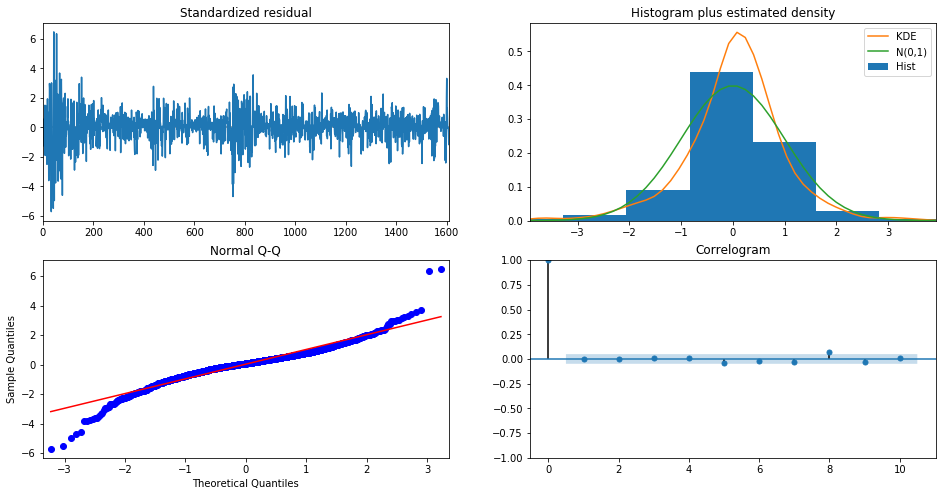

In [9]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
endog_pred = res.get_prediction(exog = exog_train).predicted_mean
mse = mean_squared_error(endog_pred, endog_train)
rmse = np.sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 323.125


# Write a rolling forecast code for test set:
# The model parameters are trained by training data + future observed data, and forecast is made using future observed data
# The model is updated at each future observation
# Prediction into many steps later is challenging due to butterfly effect

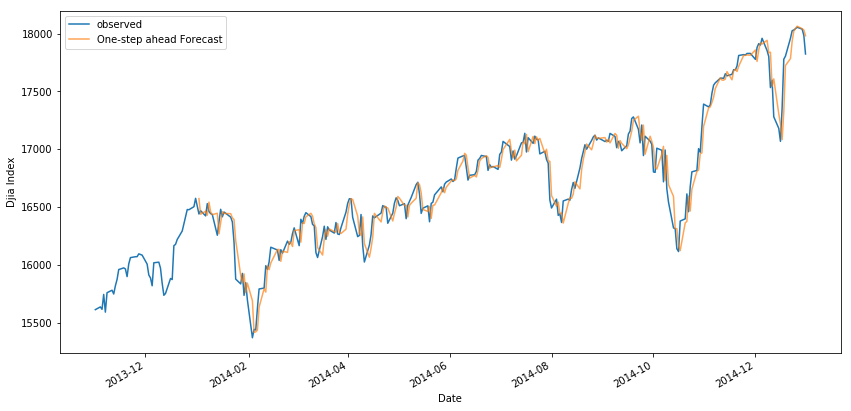

In [33]:
pred = res.get_prediction(start='2014-01-02', dynamic=False)
pred_ci = pred.conf_int()
ax = Djia['2013-11':'2014-12']['Close'].plot(label='observed')
pred.predicted_mean.plot(ax = ax,label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Djia Index')
plt.legend()
plt.show()

# 0 goes down, 1 goes up
# training set to 2015; predict forward.
# time series + classification
# sklearn.feature_extraction.text countvectorizer
# sentiments analysis + sentiment analysis
# Relavence of news to market, might some words analysis, like interest rate
# Only Dow-Jones index, we don't have data on individual assets
# deep learning probably not working

# How words are relevant to market